In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

### 사용자 정의 콜백 만들기

**`Callback` 클래스를 상속하여 사용자 정의 콜백 만들기**

- on_epoch_begin(epoch, logs): epoch 시작시
- on_epoch_end(epoch, logs): epoch 끝날 때,
- on_batch_begin(batch, logs): bath process 가 시작할 때,
- on_batch_end(batch, logs): bath process 가 끝날 때,
- on_train_begin(logs): 훈련이 시작할 때, 호출
- on_train_end(logs): 훈련이 끝날때, 호출


> ?: `logs` 에는 무엇이 들어 있을까?

> !: loss 및 accuracy


In [8]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))
        self.per_batch_losses.append(logs.get("accuracy"))
        print(logs.items())

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), 
                 self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
   1/1563 [..............................] - ETA: 15:02 - loss: 2.2382 - accuracy: 0.0938dict_items([('loss', 2.2381887435913086), ('accuracy', 0.09375)])
dict_items([('loss', 2.330946207046509), ('accuracy', 0.171875)])
dict_items([('loss', 2.268927812576294), ('accuracy', 0.1979166716337204)])
dict_items([('loss', 2.1447856426239014), ('accuracy', 0.2578125)])
dict_items([('loss', 2.0297799110412598), ('accuracy', 0.32499998807907104)])
dict_items([('loss', 1.9516105651855469), ('accuracy', 0.359375)])
dict_items([('loss', 1.874961495399475), ('accuracy', 0.3928571343421936)])
dict_items([('loss', 1.794120192527771), ('accuracy', 0.42578125)])
   9/1563 [..............................] - ETA: 10s - loss: 1.7405 - accuracy: 0.4514  dict_items([('loss', 1.7405039072036743), ('accuracy', 0.4513888955116272)])
dict_items([('loss', 1.6714922189712524), ('accuracy', 0.484375)])
dict_items([('loss', 1.6134841442108154), ('accuracy', 0.5056818127632141)])
dict_items([('loss', 1.58

dict_items([('loss', 0.7628223896026611), ('accuracy', 0.7686237096786499)])
 100/1563 [>.............................] - ETA: 9s - loss: 0.7584 - accuracy: 0.7700dict_items([('loss', 0.758362352848053), ('accuracy', 0.7699999809265137)])
dict_items([('loss', 0.7547839879989624), ('accuracy', 0.7716584205627441)])
dict_items([('loss', 0.7518331408500671), ('accuracy', 0.7726715803146362)])
dict_items([('loss', 0.7519979476928711), ('accuracy', 0.7730582356452942)])
dict_items([('loss', 0.7494925260543823), ('accuracy', 0.7734375)])
 105/1563 [=>............................] - ETA: 9s - loss: 0.7479 - accuracy: 0.7747dict_items([('loss', 0.7479297518730164), ('accuracy', 0.7747023701667786)])
dict_items([('loss', 0.7460965514183044), ('accuracy', 0.7753537893295288)])
dict_items([('loss', 0.7428513169288635), ('accuracy', 0.7765771150588989)])
dict_items([('loss', 0.739952802658081), ('accuracy', 0.7774884104728699)])
dict_items([('loss', 0.735920786857605), ('accuracy', 0.7786697149276

dict_items([('loss', 0.6030843257904053), ('accuracy', 0.8166881203651428)])
 195/1563 [==>...........................] - ETA: 9s - loss: 0.6030 - accuracy: 0.8165dict_items([('loss', 0.6029860377311707), ('accuracy', 0.8165063858032227)])
dict_items([('loss', 0.6010141372680664), ('accuracy', 0.8171237111091614)])
dict_items([('loss', 0.5995612144470215), ('accuracy', 0.8174175024032593)])
dict_items([('loss', 0.5978754758834839), ('accuracy', 0.8178661465644836)])
dict_items([('loss', 0.597863495349884), ('accuracy', 0.8178392052650452)])
dict_items([('loss', 0.5972917675971985), ('accuracy', 0.8182812333106995)])
 201/1563 [==>...........................] - ETA: 9s - loss: 0.5963 - accuracy: 0.8184dict_items([('loss', 0.5963250398635864), ('accuracy', 0.8184079527854919)])
dict_items([('loss', 0.5946889519691467), ('accuracy', 0.8189975023269653)])
dict_items([('loss', 0.5946381092071533), ('accuracy', 0.8188115954399109)])
dict_items([('loss', 0.5930428504943848), ('accuracy', 0.81

 286/1563 [====>.........................] - ETA: 9s - loss: 0.5302 - accuracy: 0.8401dict_items([('loss', 0.5302234888076782), ('accuracy', 0.8401442170143127)])
dict_items([('loss', 0.5287063121795654), ('accuracy', 0.8404834270477295)])
dict_items([('loss', 0.5277552008628845), ('accuracy', 0.8408203125)])
dict_items([('loss', 0.527077853679657), ('accuracy', 0.8410466909408569)])
dict_items([('loss', 0.5266216993331909), ('accuracy', 0.8412715792655945)])
dict_items([('loss', 0.5262592434883118), ('accuracy', 0.8413874506950378)])
 292/1563 [====>.........................] - ETA: 9s - loss: 0.5249 - accuracy: 0.8419dict_items([('loss', 0.5249012112617493), ('accuracy', 0.841930627822876)])
dict_items([('loss', 0.5241654515266418), ('accuracy', 0.8421501517295837)])
dict_items([('loss', 0.5249707102775574), ('accuracy', 0.8419430255889893)])
dict_items([('loss', 0.5249353051185608), ('accuracy', 0.8418432474136353)])
dict_items([('loss', 0.5258216857910156), ('accuracy', 0.841849684

dict_items([('loss', 0.48117199540138245), ('accuracy', 0.8563161492347717)])
dict_items([('loss', 0.4806319773197174), ('accuracy', 0.8564478754997253)])
dict_items([('loss', 0.4807184636592865), ('accuracy', 0.8563322424888611)])
dict_items([('loss', 0.4799351692199707), ('accuracy', 0.8565452694892883)])
 382/1563 [======>.......................] - ETA: 8s - loss: 0.4794 - accuracy: 0.8566dict_items([('loss', 0.4793771803379059), ('accuracy', 0.8565936088562012)])
dict_items([('loss', 0.4791807234287262), ('accuracy', 0.8565600514411926)])
dict_items([('loss', 0.4788185656070709), ('accuracy', 0.8567708134651184)])
dict_items([('loss', 0.4784497022628784), ('accuracy', 0.8568181991577148)])
dict_items([('loss', 0.47878703474998474), ('accuracy', 0.8565414547920227)])
dict_items([('loss', 0.4786638021469116), ('accuracy', 0.8567506670951843)])
 388/1563 [======>.......................] - ETA: 8s - loss: 0.4784 - accuracy: 0.8568dict_items([('loss', 0.47838878631591797), ('accuracy', 

dict_items([('loss', 0.4474286437034607), ('accuracy', 0.8662420511245728)])
 472/1563 [========>.....................] - ETA: 8s - loss: 0.4467 - accuracy: 0.8665dict_items([('loss', 0.44668909907341003), ('accuracy', 0.8664591908454895)])
dict_items([('loss', 0.44658198952674866), ('accuracy', 0.8664772510528564)])
dict_items([('loss', 0.44620364904403687), ('accuracy', 0.8664952516555786)])
dict_items([('loss', 0.4456713795661926), ('accuracy', 0.8666447401046753)])
dict_items([('loss', 0.4459340274333954), ('accuracy', 0.8666622638702393)])
dict_items([('loss', 0.4455081820487976), ('accuracy', 0.8667452931404114)])
 478/1563 [========>.....................] - ETA: 8s - loss: 0.4454 - accuracy: 0.8668dict_items([('loss', 0.4454488456249237), ('accuracy', 0.8668279051780701)])
dict_items([('loss', 0.44620826840400696), ('accuracy', 0.8667797446250916)])
dict_items([('loss', 0.4456327259540558), ('accuracy', 0.8669270873069763)])
dict_items([('loss', 0.44528549909591675), ('accuracy'

dict_items([('loss', 0.42298659682273865), ('accuracy', 0.8742215037345886)])
dict_items([('loss', 0.4225131571292877), ('accuracy', 0.8742784261703491)])
dict_items([('loss', 0.4220230281352997), ('accuracy', 0.874445915222168)])
dict_items([('loss', 0.421808660030365), ('accuracy', 0.8745022416114807)])
dict_items([('loss', 0.4215504825115204), ('accuracy', 0.8745583295822144)])
dict_items([('loss', 0.4212481379508972), ('accuracy', 0.8745591044425964)])
 568/1563 [=========>....................] - ETA: 7s - loss: 0.4208 - accuracy: 0.8747dict_items([('loss', 0.4207894206047058), ('accuracy', 0.8747249245643616)])
dict_items([('loss', 0.42045390605926514), ('accuracy', 0.8748352527618408)])
dict_items([('loss', 0.4201166331768036), ('accuracy', 0.8748903274536133)])
dict_items([('loss', 0.4198281168937683), ('accuracy', 0.8749452829360962)])
dict_items([('loss', 0.41919034719467163), ('accuracy', 0.8751092553138733)])
dict_items([('loss', 0.41904106736183167), ('accuracy', 0.87505453

dict_items([('loss', 0.3992125988006592), ('accuracy', 0.8809160590171814)])
dict_items([('loss', 0.39910534024238586), ('accuracy', 0.8810023069381714)])
 657/1563 [===========>..................] - ETA: 6s - loss: 0.3986 - accuracy: 0.8811dict_items([('loss', 0.39864295721054077), ('accuracy', 0.8811358213424683)])
dict_items([('loss', 0.3983207643032074), ('accuracy', 0.8812215328216553)])
dict_items([('loss', 0.39793500304222107), ('accuracy', 0.8813068866729736)])
dict_items([('loss', 0.3980870246887207), ('accuracy', 0.8812973499298096)])
dict_items([('loss', 0.3976418375968933), ('accuracy', 0.8814296722412109)])
dict_items([('loss', 0.39749523997306824), ('accuracy', 0.8815143704414368)])
 663/1563 [===========>..................] - ETA: 6s - loss: 0.3971 - accuracy: 0.8816dict_items([('loss', 0.39705896377563477), ('accuracy', 0.881645917892456)])
dict_items([('loss', 0.3966331481933594), ('accuracy', 0.8817300200462341)])
dict_items([('loss', 0.39693760871887207), ('accuracy'

 747/1563 [=============>................] - ETA: 6s - loss: 0.3795 - accuracy: 0.8868dict_items([('loss', 0.3795139193534851), ('accuracy', 0.8868390321731567)])
dict_items([('loss', 0.3793807923793793), ('accuracy', 0.886864960193634)])
dict_items([('loss', 0.37908726930618286), ('accuracy', 0.8868908286094666)])
dict_items([('loss', 0.37907522916793823), ('accuracy', 0.8869583606719971)])
dict_items([('loss', 0.37923169136047363), ('accuracy', 0.886900782585144)])
 752/1563 [=============>................] - ETA: 6s - loss: 0.3788 - accuracy: 0.8871dict_items([('loss', 0.37881726026535034), ('accuracy', 0.8870512247085571)])
dict_items([('loss', 0.37868553400039673), ('accuracy', 0.8870766758918762)])
dict_items([('loss', 0.37827953696250916), ('accuracy', 0.8871850371360779)])
dict_items([('loss', 0.377895325422287), ('accuracy', 0.8872930407524109)])
dict_items([('loss', 0.377827525138855), ('accuracy', 0.8872767686843872)])
dict_items([('loss', 0.3774260878562927), ('accuracy', 0

dict_items([('loss', 0.36396515369415283), ('accuracy', 0.8911470770835876)])
 839/1563 [===============>..............] - ETA: 5s - loss: 0.3639 - accuracy: 0.8912dict_items([('loss', 0.36389726400375366), ('accuracy', 0.8912023305892944)])
dict_items([('loss', 0.3639007806777954), ('accuracy', 0.8911830186843872)])
dict_items([('loss', 0.36373868584632874), ('accuracy', 0.8912009596824646)])
dict_items([('loss', 0.36351868510246277), ('accuracy', 0.8912559151649475)])
dict_items([('loss', 0.36338695883750916), ('accuracy', 0.8913108110427856)])
dict_items([('loss', 0.36319223046302795), ('accuracy', 0.8913655281066895)])
dict_items([('loss', 0.3629172444343567), ('accuracy', 0.8914570808410645)])
dict_items([('loss', 0.3628790080547333), ('accuracy', 0.8914006948471069)])
 847/1563 [===============>..............] - ETA: 5s - loss: 0.3626 - accuracy: 0.8915dict_items([('loss', 0.36262303590774536), ('accuracy', 0.8914920091629028)])
dict_items([('loss', 0.36287736892700195), ('accura

 930/1563 [================>.............] - ETA: 4s - loss: 0.3502 - accuracy: 0.8949dict_items([('loss', 0.3502252697944641), ('accuracy', 0.8949260711669922)])
dict_items([('loss', 0.35001376271247864), ('accuracy', 0.8949717879295349)])
dict_items([('loss', 0.3497418463230133), ('accuracy', 0.8950845003128052)])
dict_items([('loss', 0.34953784942626953), ('accuracy', 0.8951299786567688)])
dict_items([('loss', 0.34944966435432434), ('accuracy', 0.8951084017753601)])
dict_items([('loss', 0.349383145570755), ('accuracy', 0.8951203227043152)])
dict_items([('loss', 0.34934207797050476), ('accuracy', 0.8951321840286255)])
dict_items([('loss', 0.3493736684322357), ('accuracy', 0.8951107263565063)])
 938/1563 [=================>............] - ETA: 4s - loss: 0.3490 - accuracy: 0.8952dict_items([('loss', 0.34904247522354126), ('accuracy', 0.895222544670105)])
dict_items([('loss', 0.3490958511829376), ('accuracy', 0.8951677083969116)])
dict_items([('loss', 0.3488747179508209), ('accuracy', 

dict_items([('loss', 0.33803820610046387), ('accuracy', 0.8982309103012085)])
dict_items([('loss', 0.33795157074928284), ('accuracy', 0.8982998728752136)])
dict_items([('loss', 0.33771196007728577), ('accuracy', 0.8983381986618042)])
dict_items([('loss', 0.3374786674976349), ('accuracy', 0.898406982421875)])
1025/1563 [==================>...........] - ETA: 4s - loss: 0.3374 - accuracy: 0.8984dict_items([('loss', 0.3373568058013916), ('accuracy', 0.8984146118164062)])
dict_items([('loss', 0.3373354375362396), ('accuracy', 0.8984527587890625)])
dict_items([('loss', 0.33743220567703247), ('accuracy', 0.8984298706054688)])
dict_items([('loss', 0.33746057748794556), ('accuracy', 0.8984678983688354)])
dict_items([('loss', 0.3373873829841614), ('accuracy', 0.8984754681587219)])
dict_items([('loss', 0.3374116122722626), ('accuracy', 0.8984526991844177)])
1031/1563 [==================>...........] - ETA: 4s - loss: 0.3371 - accuracy: 0.8986dict_items([('loss', 0.33711177110671997), ('accuracy'

dict_items([('loss', 0.32785874605178833), ('accuracy', 0.9017657041549683)])
dict_items([('loss', 0.32767388224601746), ('accuracy', 0.9017977118492126)])
1117/1563 [====================>.........] - ETA: 3s - loss: 0.3275 - accuracy: 0.9019dict_items([('loss', 0.3274710774421692), ('accuracy', 0.9018576741218567)])
dict_items([('loss', 0.3277558982372284), ('accuracy', 0.9017777442932129)])
dict_items([('loss', 0.32767927646636963), ('accuracy', 0.9018375873565674)])
dict_items([('loss', 0.32765117287635803), ('accuracy', 0.9018415212631226)])
dict_items([('loss', 0.3275531828403473), ('accuracy', 0.9018733501434326)])
1122/1563 [====================>.........] - ETA: 3s - loss: 0.3276 - accuracy: 0.9019dict_items([('loss', 0.3275768458843231), ('accuracy', 0.9019050598144531)])
dict_items([('loss', 0.32741549611091614), ('accuracy', 0.9019367694854736)])
dict_items([('loss', 0.32729604840278625), ('accuracy', 0.9019684195518494)])
dict_items([('loss', 0.32726696133613586), ('accurac

dict_items([('loss', 0.32002386450767517), ('accuracy', 0.9045440554618835)])
dict_items([('loss', 0.319793164730072), ('accuracy', 0.9046229124069214)])
dict_items([('loss', 0.3196293115615845), ('accuracy', 0.904650092124939)])
1212/1563 [======================>.......] - ETA: 2s - loss: 0.3194 - accuracy: 0.9047dict_items([('loss', 0.3194068372249603), ('accuracy', 0.9047287702560425)])
dict_items([('loss', 0.31921273469924927), ('accuracy', 0.9047815203666687)])
dict_items([('loss', 0.3190968930721283), ('accuracy', 0.9048084616661072)])
dict_items([('loss', 0.31887808442115784), ('accuracy', 0.9048868417739868)])
dict_items([('loss', 0.31933093070983887), ('accuracy', 0.9048879742622375)])
dict_items([('loss', 0.3191724419593811), ('accuracy', 0.9049147367477417)])
dict_items([('loss', 0.3189166486263275), ('accuracy', 0.9049928188323975)])
dict_items([('loss', 0.3187626898288727), ('accuracy', 0.9050194621086121)])
dict_items([('loss', 0.31857994198799133), ('accuracy', 0.9050717

1303/1563 [========================>.....] - ETA: 1s - loss: 0.3134 - accuracy: 0.9072dict_items([('loss', 0.31343621015548706), ('accuracy', 0.9071853160858154)])
dict_items([('loss', 0.31343603134155273), ('accuracy', 0.9072325825691223)])
dict_items([('loss', 0.3133702278137207), ('accuracy', 0.9072557687759399)])
dict_items([('loss', 0.3131958842277527), ('accuracy', 0.9073267579078674)])
dict_items([('loss', 0.3130306601524353), ('accuracy', 0.9073737859725952)])
1308/1563 [========================>.....] - ETA: 1s - loss: 0.3130 - accuracy: 0.9073dict_items([('loss', 0.3129590153694153), ('accuracy', 0.9073489904403687)])
dict_items([('loss', 0.3127650022506714), ('accuracy', 0.9073958992958069)])
dict_items([('loss', 0.31263816356658936), ('accuracy', 0.9074427485466003)])
dict_items([('loss', 0.31254491209983826), ('accuracy', 0.9074656963348389)])
dict_items([('loss', 0.31260669231414795), ('accuracy', 0.9074647426605225)])
dict_items([('loss', 0.3125092685222626), ('accuracy'

dict_items([('loss', 0.30569857358932495), ('accuracy', 0.9092518091201782)])
dict_items([('loss', 0.3055611550807953), ('accuracy', 0.9092944264411926)])
1397/1563 [=========================>....] - ETA: 1s - loss: 0.3055 - accuracy: 0.9093dict_items([('loss', 0.30546674132347107), ('accuracy', 0.9093369841575623)])
dict_items([('loss', 0.3054232597351074), ('accuracy', 0.9093571305274963)])
dict_items([('loss', 0.3053623139858246), ('accuracy', 0.9093549251556396)])
dict_items([('loss', 0.30548402667045593), ('accuracy', 0.9093080163002014)])
dict_items([('loss', 0.30547231435775757), ('accuracy', 0.9093058705329895)])
1402/1563 [=========================>....] - ETA: 1s - loss: 0.3054 - accuracy: 0.9093dict_items([('loss', 0.3054008185863495), ('accuracy', 0.9093036651611328)])
dict_items([('loss', 0.3052263557910919), ('accuracy', 0.9093683362007141)])
dict_items([('loss', 0.3052515387535095), ('accuracy', 0.9093438386917114)])
dict_items([('loss', 0.30514803528785706), ('accuracy'

dict_items([('loss', 0.29865562915802), ('accuracy', 0.91127610206604)])
dict_items([('loss', 0.2985215187072754), ('accuracy', 0.9113147258758545)])
dict_items([('loss', 0.2984108328819275), ('accuracy', 0.9113323092460632)])
dict_items([('loss', 0.2983493506908417), ('accuracy', 0.9113708734512329)])
1490/1563 [===========================>..] - ETA: 0s - loss: 0.2982 - accuracy: 0.9114dict_items([('loss', 0.2982417643070221), ('accuracy', 0.9113674759864807)])
dict_items([('loss', 0.29820722341537476), ('accuracy', 0.9113640189170837)])
dict_items([('loss', 0.29810574650764465), ('accuracy', 0.9114024639129639)])
dict_items([('loss', 0.29824987053871155), ('accuracy', 0.9113780856132507)])
dict_items([('loss', 0.29809775948524475), ('accuracy', 0.9114164710044861)])
dict_items([('loss', 0.29805561900138855), ('accuracy', 0.9113921523094177)])
1496/1563 [===========================>..] - ETA: 0s - loss: 0.2979 - accuracy: 0.9114dict_items([('loss', 0.2978925406932831), ('accuracy', 0.

  21/1563 [..............................] - ETA: 8s - loss: 0.1592 - accuracy: 0.9390dict_items([('loss', 0.15919360518455505), ('accuracy', 0.9389880895614624)])
dict_items([('loss', 0.16013626754283905), ('accuracy', 0.9389204382896423)])
dict_items([('loss', 0.15857349336147308), ('accuracy', 0.938858687877655)])
dict_items([('loss', 0.16385714709758759), ('accuracy', 0.9375)])
dict_items([('loss', 0.16035564243793488), ('accuracy', 0.9387500286102295)])
dict_items([('loss', 0.16141997277736664), ('accuracy', 0.9387019276618958)])
dict_items([('loss', 0.16754256188869476), ('accuracy', 0.9398148059844971)])
dict_items([('loss', 0.1668398678302765), ('accuracy', 0.9408482313156128)])
  29/1563 [..............................] - ETA: 8s - loss: 0.1701 - accuracy: 0.9397dict_items([('loss', 0.1700591742992401), ('accuracy', 0.9396551847457886)])
dict_items([('loss', 0.16511230170726776), ('accuracy', 0.9416666626930237)])
dict_items([('loss', 0.17192505300045013), ('accuracy', 0.94052

 117/1563 [=>............................] - ETA: 9s - loss: 0.1780 - accuracy: 0.9458dict_items([('loss', 0.17800480127334595), ('accuracy', 0.9457799196243286)])
dict_items([('loss', 0.1771892011165619), ('accuracy', 0.945709764957428)])
dict_items([('loss', 0.17685990035533905), ('accuracy', 0.9456407427787781)])
dict_items([('loss', 0.17563341557979584), ('accuracy', 0.946093738079071)])
dict_items([('loss', 0.17600688338279724), ('accuracy', 0.9462810158729553)])
dict_items([('loss', 0.1753503978252411), ('accuracy', 0.9464651346206665)])
dict_items([('loss', 0.17493246495723724), ('accuracy', 0.946392297744751)])
dict_items([('loss', 0.17401039600372314), ('accuracy', 0.9468246102333069)])
dict_items([('loss', 0.1776053011417389), ('accuracy', 0.9467499852180481)])
 126/1563 [=>............................] - ETA: 9s - loss: 0.1790 - accuracy: 0.9464dict_items([('loss', 0.17903533577919006), ('accuracy', 0.9464285969734192)])
dict_items([('loss', 0.17835305631160736), ('accuracy'

dict_items([('loss', 0.1888047456741333), ('accuracy', 0.9453125)])
dict_items([('loss', 0.1883583664894104), ('accuracy', 0.9454225301742554)])
dict_items([('loss', 0.18767862021923065), ('accuracy', 0.9455315470695496)])
dict_items([('loss', 0.18890121579170227), ('accuracy', 0.945348858833313)])
 216/1563 [===>..........................] - ETA: 8s - loss: 0.1897 - accuracy: 0.9450dict_items([('loss', 0.18966780602931976), ('accuracy', 0.9450231194496155)])
dict_items([('loss', 0.1889137625694275), ('accuracy', 0.9452764987945557)])
dict_items([('loss', 0.1899479180574417), ('accuracy', 0.9450975060462952)])
dict_items([('loss', 0.18926551938056946), ('accuracy', 0.9453482031822205)])
dict_items([('loss', 0.18868884444236755), ('accuracy', 0.9454545378684998)])
dict_items([('loss', 0.1897668093442917), ('accuracy', 0.9452771544456482)])
dict_items([('loss', 0.1920647770166397), ('accuracy', 0.9449605941772461)])
 223/1563 [===>..........................] - ETA: 8s - loss: 0.1913 - ac

dict_items([('loss', 0.18471083045005798), ('accuracy', 0.9467516541481018)])
dict_items([('loss', 0.1841486543416977), ('accuracy', 0.9469262361526489)])
dict_items([('loss', 0.18570253252983093), ('accuracy', 0.9469975233078003)])
dict_items([('loss', 0.18634545803070068), ('accuracy', 0.9470683932304382)])
 308/1563 [====>.........................] - ETA: 8s - loss: 0.1858 - accuracy: 0.9472dict_items([('loss', 0.18578965961933136), ('accuracy', 0.9472402334213257)])
dict_items([('loss', 0.1856807917356491), ('accuracy', 0.9473098516464233)])
dict_items([('loss', 0.1852872669696808), ('accuracy', 0.9474798440933228)])
dict_items([('loss', 0.18556547164916992), ('accuracy', 0.9474477767944336)])
dict_items([('loss', 0.1856716424226761), ('accuracy', 0.9473156929016113)])
 313/1563 [=====>........................] - ETA: 8s - loss: 0.1854 - accuracy: 0.9474dict_items([('loss', 0.18538986146450043), ('accuracy', 0.9473841786384583)])
dict_items([('loss', 0.18498891592025757), ('accurac

dict_items([('loss', 0.1845823973417282), ('accuracy', 0.9461587071418762)])
dict_items([('loss', 0.18417654931545258), ('accuracy', 0.9462939500808716)])
 399/1563 [======>.......................] - ETA: 8s - loss: 0.1837 - accuracy: 0.9464dict_items([('loss', 0.18374010920524597), ('accuracy', 0.9464285969734192)])
dict_items([('loss', 0.18363367021083832), ('accuracy', 0.946484386920929)])
dict_items([('loss', 0.1836266964673996), ('accuracy', 0.9464619755744934)])
dict_items([('loss', 0.18332189321517944), ('accuracy', 0.9465951323509216)])
dict_items([('loss', 0.1830061972141266), ('accuracy', 0.9467276930809021)])
dict_items([('loss', 0.18268732726573944), ('accuracy', 0.9467821717262268)])
 405/1563 [======>.......................] - ETA: 8s - loss: 0.1823 - accuracy: 0.9469dict_items([('loss', 0.1823333352804184), ('accuracy', 0.9469135999679565)])
dict_items([('loss', 0.18277615308761597), ('accuracy', 0.946659505367279)])
dict_items([('loss', 0.18247583508491516), ('accuracy'

dict_items([('loss', 0.17981792986392975), ('accuracy', 0.9476610422134399)])
dict_items([('loss', 0.18037797510623932), ('accuracy', 0.9477040767669678)])
dict_items([('loss', 0.18021005392074585), ('accuracy', 0.9477469325065613)])
dict_items([('loss', 0.17996294796466827), ('accuracy', 0.9477896094322205)])
dict_items([('loss', 0.179779052734375), ('accuracy', 0.9478321671485901)])
dict_items([('loss', 0.1799231469631195), ('accuracy', 0.9478744864463806)])
dict_items([('loss', 0.17972078919410706), ('accuracy', 0.9479166865348816)])
dict_items([('loss', 0.17995582520961761), ('accuracy', 0.9478956460952759)])
 497/1563 [========>.....................] - ETA: 7s - loss: 0.1796 - accuracy: 0.9480dict_items([('loss', 0.1796482354402542), ('accuracy', 0.9480004906654358)])
dict_items([('loss', 0.17932739853858948), ('accuracy', 0.9481049180030823)])
dict_items([('loss', 0.17920680344104767), ('accuracy', 0.9481462836265564)])
dict_items([('loss', 0.17909197509288788), ('accuracy', 0.94

dict_items([('loss', 0.1735730767250061), ('accuracy', 0.9489368796348572)])
dict_items([('loss', 0.1735347956418991), ('accuracy', 0.9489708542823792)])
dict_items([('loss', 0.17385795712471008), ('accuracy', 0.9490047097206116)])
 585/1563 [==========>...................] - ETA: 7s - loss: 0.1736 - accuracy: 0.9491dict_items([('loss', 0.17362679541110992), ('accuracy', 0.9490918517112732)])
dict_items([('loss', 0.17347924411296844), ('accuracy', 0.9490721225738525)])
dict_items([('loss', 0.17338714003562927), ('accuracy', 0.9491056203842163)])
dict_items([('loss', 0.1735730767250061), ('accuracy', 0.9490858912467957)])
dict_items([('loss', 0.17349673807621002), ('accuracy', 0.9490662217140198)])
dict_items([('loss', 0.17323556542396545), ('accuracy', 0.9491525292396545)])
dict_items([('loss', 0.17306718230247498), ('accuracy', 0.9491328001022339)])
dict_items([('loss', 0.17296622693538666), ('accuracy', 0.9491131901741028)])
 593/1563 [==========>...................] - ETA: 6s - loss

 674/1563 [===========>..................] - ETA: 6s - loss: 0.1720 - accuracy: 0.9499dict_items([('loss', 0.17201055586338043), ('accuracy', 0.9499258399009705)])
dict_items([('loss', 0.17205901443958282), ('accuracy', 0.9499536752700806)])
dict_items([('loss', 0.17196156084537506), ('accuracy', 0.9499815106391907)])
dict_items([('loss', 0.17174388468265533), ('accuracy', 0.9500554203987122)])
dict_items([('loss', 0.17156101763248444), ('accuracy', 0.9500829577445984)])
dict_items([('loss', 0.17140643298625946), ('accuracy', 0.9501104354858398)])
dict_items([('loss', 0.17140652239322662), ('accuracy', 0.9500459432601929)])
dict_items([('loss', 0.17127923667430878), ('accuracy', 0.9500734210014343)])
dict_items([('loss', 0.17112340033054352), ('accuracy', 0.9501007795333862)])
 683/1563 [============>.................] - ETA: 6s - loss: 0.1711 - accuracy: 0.9501dict_items([('loss', 0.1710980087518692), ('accuracy', 0.9500823616981506)])
dict_items([('loss', 0.1710311323404312), ('accur

 766/1563 [=============>................] - ETA: 5s - loss: 0.1692 - accuracy: 0.9501dict_items([('loss', 0.1691908836364746), ('accuracy', 0.9500652551651001)])
dict_items([('loss', 0.1690308302640915), ('accuracy', 0.9501304030418396)])
dict_items([('loss', 0.16881965100765228), ('accuracy', 0.9501953125)])
dict_items([('loss', 0.16871793568134308), ('accuracy', 0.950219452381134)])
dict_items([('loss', 0.1685909777879715), ('accuracy', 0.9502435326576233)])
dict_items([('loss', 0.16859067976474762), ('accuracy', 0.950267493724823)])
dict_items([('loss', 0.16873520612716675), ('accuracy', 0.9502914547920227)])
dict_items([('loss', 0.1688513159751892), ('accuracy', 0.9502748847007751)])
dict_items([('loss', 0.16872596740722656), ('accuracy', 0.9502987861633301)])
 775/1563 [=============>................] - ETA: 5s - loss: 0.1686 - accuracy: 0.9503dict_items([('loss', 0.16859222948551178), ('accuracy', 0.9503225684165955)])
dict_items([('loss', 0.1684204638004303), ('accuracy', 0.950

dict_items([('loss', 0.16784363985061646), ('accuracy', 0.9507421255111694)])
dict_items([('loss', 0.16810062527656555), ('accuracy', 0.9507267475128174)])
 861/1563 [===============>..............] - ETA: 5s - loss: 0.1679 - accuracy: 0.9508dict_items([('loss', 0.1679418534040451), ('accuracy', 0.9507839679718018)])
dict_items([('loss', 0.16810519993305206), ('accuracy', 0.9507685899734497)])
dict_items([('loss', 0.16820628941059113), ('accuracy', 0.9507893919944763)])
dict_items([('loss', 0.16807624697685242), ('accuracy', 0.9508463740348816)])
dict_items([('loss', 0.1682363897562027), ('accuracy', 0.9507948160171509)])
dict_items([('loss', 0.16817176342010498), ('accuracy', 0.9507794380187988)])
dict_items([('loss', 0.16802282631397247), ('accuracy', 0.9508001804351807)])
dict_items([('loss', 0.1679917275905609), ('accuracy', 0.9508208632469177)])
 869/1563 [===============>..............] - ETA: 5s - loss: 0.1680 - accuracy: 0.9508dict_items([('loss', 0.16802197694778442), ('accura

 952/1563 [=================>............] - ETA: 4s - loss: 0.1663 - accuracy: 0.9515dict_items([('loss', 0.1663050353527069), ('accuracy', 0.9514508843421936)])
dict_items([('loss', 0.16631078720092773), ('accuracy', 0.9514690637588501)])
dict_items([('loss', 0.1664125919342041), ('accuracy', 0.9514544010162354)])
dict_items([('loss', 0.16637533903121948), ('accuracy', 0.9514725208282471)])
dict_items([('loss', 0.16630768775939941), ('accuracy', 0.9514579176902771)])
dict_items([('loss', 0.16620400547981262), ('accuracy', 0.951508641242981)])
dict_items([('loss', 0.16616186499595642), ('accuracy', 0.9514939785003662)])
dict_items([('loss', 0.16607879102230072), ('accuracy', 0.951479434967041)])
dict_items([('loss', 0.1659422665834427), ('accuracy', 0.9514973759651184)])
 961/1563 [=================>............] - ETA: 4s - loss: 0.1661 - accuracy: 0.9514dict_items([('loss', 0.1661078929901123), ('accuracy', 0.9514178037643433)])
dict_items([('loss', 0.16599521040916443), ('accuracy'

1043/1563 [===================>..........] - ETA: 3s - loss: 0.1664 - accuracy: 0.9514dict_items([('loss', 0.166364848613739), ('accuracy', 0.9513722658157349)])
dict_items([('loss', 0.16627922654151917), ('accuracy', 0.9513888955116272)])
dict_items([('loss', 0.16644908487796783), ('accuracy', 0.951345682144165)])
dict_items([('loss', 0.1664845198392868), ('accuracy', 0.9513623118400574)])
dict_items([('loss', 0.16644158959388733), ('accuracy', 0.9513490796089172)])
dict_items([('loss', 0.16650541126728058), ('accuracy', 0.9513060450553894)])
1049/1563 [===================>..........] - ETA: 3s - loss: 0.1664 - accuracy: 0.9513dict_items([('loss', 0.16643041372299194), ('accuracy', 0.9513226747512817)])
dict_items([('loss', 0.16643983125686646), ('accuracy', 0.9513393044471741)])
dict_items([('loss', 0.16630855202674866), ('accuracy', 0.9513855576515198)])
dict_items([('loss', 0.16650506854057312), ('accuracy', 0.9514020681381226)])
dict_items([('loss', 0.16660621762275696), ('accurac

dict_items([('loss', 0.1682332307100296), ('accuracy', 0.9515969157218933)])
dict_items([('loss', 0.16826558113098145), ('accuracy', 0.9515569806098938)])
dict_items([('loss', 0.16837075352668762), ('accuracy', 0.9514896869659424)])
1138/1563 [====================>.........] - ETA: 3s - loss: 0.1685 - accuracy: 0.9514dict_items([('loss', 0.16850030422210693), ('accuracy', 0.9514499306678772)])
dict_items([('loss', 0.16837690770626068), ('accuracy', 0.9514925479888916)])
dict_items([('loss', 0.1683603972196579), ('accuracy', 0.9514528512954712)])
dict_items([('loss', 0.16823537647724152), ('accuracy', 0.9514954090118408)])
dict_items([('loss', 0.16813254356384277), ('accuracy', 0.951510488986969)])
dict_items([('loss', 0.16810765862464905), ('accuracy', 0.9515255689620972)])
dict_items([('loss', 0.16798308491706848), ('accuracy', 0.9515679478645325)])
dict_items([('loss', 0.16784726083278656), ('accuracy', 0.951610267162323)])
dict_items([('loss', 0.16774143278598785), ('accuracy', 0.95

dict_items([('loss', 0.1682729721069336), ('accuracy', 0.9519680738449097)])
dict_items([('loss', 0.16818693280220032), ('accuracy', 0.9519817233085632)])
1231/1563 [======================>.......] - ETA: 2s - loss: 0.1683 - accuracy: 0.9520dict_items([('loss', 0.16827288269996643), ('accuracy', 0.951995313167572)])
dict_items([('loss', 0.1682291328907013), ('accuracy', 0.9520089030265808)])
dict_items([('loss', 0.16812610626220703), ('accuracy', 0.9520224928855896)])
dict_items([('loss', 0.16823840141296387), ('accuracy', 0.9520107507705688)])
dict_items([('loss', 0.16826368868350983), ('accuracy', 0.9519990086555481)])
dict_items([('loss', 0.16823437809944153), ('accuracy', 0.9519872665405273)])
1237/1563 [======================>.......] - ETA: 2s - loss: 0.1683 - accuracy: 0.9520dict_items([('loss', 0.1683400273323059), ('accuracy', 0.9520007967948914)])
dict_items([('loss', 0.16821596026420593), ('accuracy', 0.9520395994186401)])
dict_items([('loss', 0.16823044419288635), ('accurac

dict_items([('loss', 0.16607357561588287), ('accuracy', 0.9522976279258728)])
dict_items([('loss', 0.1661398708820343), ('accuracy', 0.9522864818572998)])
dict_items([('loss', 0.1660900115966797), ('accuracy', 0.9522988796234131)])
dict_items([('loss', 0.16612130403518677), ('accuracy', 0.9522405862808228)])
dict_items([('loss', 0.16600777208805084), ('accuracy', 0.9522765874862671)])
dict_items([('loss', 0.1659998893737793), ('accuracy', 0.9522418975830078)])
1328/1563 [========================>.....] - ETA: 1s - loss: 0.1660 - accuracy: 0.9522dict_items([('loss', 0.1659986823797226), ('accuracy', 0.9522308111190796)])
dict_items([('loss', 0.1660192459821701), ('accuracy', 0.9522197246551514)])
dict_items([('loss', 0.16592711210250854), ('accuracy', 0.9522321224212646)])
dict_items([('loss', 0.16588231921195984), ('accuracy', 0.9522210955619812)])
1332/1563 [========================>.....] - ETA: 1s - loss: 0.1658 - accuracy: 0.9523dict_items([('loss', 0.16577664017677307), ('accuracy

dict_items([('loss', 0.16541099548339844), ('accuracy', 0.9522084593772888)])
dict_items([('loss', 0.16548247635364532), ('accuracy', 0.952176034450531)])
1417/1563 [==========================>...] - ETA: 1s - loss: 0.1654 - accuracy: 0.9522dict_items([('loss', 0.16538101434707642), ('accuracy', 0.9522097706794739)])
dict_items([('loss', 0.1657402515411377), ('accuracy', 0.952133297920227)])
dict_items([('loss', 0.16577410697937012), ('accuracy', 0.9521229863166809)])
dict_items([('loss', 0.16598786413669586), ('accuracy', 0.9520686864852905)])
dict_items([('loss', 0.16589593887329102), ('accuracy', 0.9521023631095886)])
dict_items([('loss', 0.16618116199970245), ('accuracy', 0.9521141052246094)])
dict_items([('loss', 0.16622516512870789), ('accuracy', 0.9520818591117859)])
dict_items([('loss', 0.16629178822040558), ('accuracy', 0.9520496726036072)])
dict_items([('loss', 0.16619430482387543), ('accuracy', 0.9520833492279053)])
1426/1563 [==========================>...] - ETA: 1s - loss

dict_items([('loss', 0.16379836201667786), ('accuracy', 0.9528865218162537)])
dict_items([('loss', 0.1637432724237442), ('accuracy', 0.9528970718383789)])
1509/1563 [===========================>..] - ETA: 0s - loss: 0.1638 - accuracy: 0.9529dict_items([('loss', 0.16381186246871948), ('accuracy', 0.9528868198394775)])
dict_items([('loss', 0.16382810473442078), ('accuracy', 0.952876627445221)])
dict_items([('loss', 0.16380128264427185), ('accuracy', 0.9528871774673462)])
dict_items([('loss', 0.1640610247850418), ('accuracy', 0.9528356194496155)])
dict_items([('loss', 0.16405196487903595), ('accuracy', 0.9528461694717407)])
dict_items([('loss', 0.16409291326999664), ('accuracy', 0.9528360366821289)])
dict_items([('loss', 0.16406327486038208), ('accuracy', 0.9528259038925171)])
dict_items([('loss', 0.16401764750480652), ('accuracy', 0.9528363943099976)])
dict_items([('loss', 0.16391772031784058), ('accuracy', 0.9528675079345703)])
1518/1563 [============================>.] - ETA: 0s - loss

dict_items([('loss', 0.13419389724731445), ('accuracy', 0.9647436141967773)])
  40/1563 [..............................] - ETA: 8s - loss: 0.1382 - accuracy: 0.9648dict_items([('loss', 0.1382092535495758), ('accuracy', 0.96484375)])
dict_items([('loss', 0.14192870259284973), ('accuracy', 0.9634146094322205)])
dict_items([('loss', 0.14314937591552734), ('accuracy', 0.9627976417541504)])
dict_items([('loss', 0.14375659823417664), ('accuracy', 0.9629360437393188)])
dict_items([('loss', 0.14519672095775604), ('accuracy', 0.9623579382896423)])
dict_items([('loss', 0.14316831529140472), ('accuracy', 0.9631944298744202)])
dict_items([('loss', 0.14869017899036407), ('accuracy', 0.96263587474823)])
  47/1563 [..............................] - ETA: 8s - loss: 0.1462 - accuracy: 0.9634dict_items([('loss', 0.14621508121490479), ('accuracy', 0.9634308218955994)])
dict_items([('loss', 0.1459004133939743), ('accuracy', 0.962890625)])
dict_items([('loss', 0.14440062642097473), ('accuracy', 0.963010191

dict_items([('loss', 0.15517760813236237), ('accuracy', 0.9595864415168762)])
 134/1563 [=>............................] - ETA: 9s - loss: 0.1553 - accuracy: 0.9597dict_items([('loss', 0.1553492546081543), ('accuracy', 0.9596548676490784)])
dict_items([('loss', 0.15424756705760956), ('accuracy', 0.9599537253379822)])
dict_items([('loss', 0.15541470050811768), ('accuracy', 0.9600183963775635)])
dict_items([('loss', 0.1545896679162979), ('accuracy', 0.9603102207183838)])
dict_items([('loss', 0.15422944724559784), ('accuracy', 0.9603713750839233)])
dict_items([('loss', 0.15450580418109894), ('accuracy', 0.9602068066596985)])
dict_items([('loss', 0.15550334751605988), ('accuracy', 0.9600446224212646)])
dict_items([('loss', 0.15466275811195374), ('accuracy', 0.9603280425071716)])
dict_items([('loss', 0.15373891592025757), ('accuracy', 0.9606074094772339)])
 143/1563 [=>............................] - ETA: 9s - loss: 0.1553 - accuracy: 0.9607dict_items([('loss', 0.15527863800525665), ('accur

dict_items([('loss', 0.15487878024578094), ('accuracy', 0.9590708017349243)])
 227/1563 [===>..........................] - ETA: 8s - loss: 0.1548 - accuracy: 0.9591dict_items([('loss', 0.1548372358083725), ('accuracy', 0.9591134190559387)])
dict_items([('loss', 0.15437300503253937), ('accuracy', 0.9591556787490845)])
dict_items([('loss', 0.15395203232765198), ('accuracy', 0.9591975808143616)])
dict_items([('loss', 0.15466247498989105), ('accuracy', 0.9591032862663269)])
dict_items([('loss', 0.1550299972295761), ('accuracy', 0.9590097665786743)])
dict_items([('loss', 0.15485472977161407), ('accuracy', 0.9589170217514038)])
dict_items([('loss', 0.15430329740047455), ('accuracy', 0.9590933322906494)])
 234/1563 [===>..........................] - ETA: 8s - loss: 0.1544 - accuracy: 0.9590dict_items([('loss', 0.1544264405965805), ('accuracy', 0.9590010643005371)])
dict_items([('loss', 0.15519128739833832), ('accuracy', 0.9590425491333008)])
dict_items([('loss', 0.1552610993385315), ('accurac

 319/1563 [=====>........................] - ETA: 8s - loss: 0.1539 - accuracy: 0.9597dict_items([('loss', 0.1538807451725006), ('accuracy', 0.9597374796867371)])
dict_items([('loss', 0.1536630541086197), ('accuracy', 0.959765613079071)])
dict_items([('loss', 0.15361365675926208), ('accuracy', 0.9596962332725525)])
dict_items([('loss', 0.1535203605890274), ('accuracy', 0.9597243666648865)])
dict_items([('loss', 0.1531645655632019), ('accuracy', 0.9598490595817566)])
 324/1563 [=====>........................] - ETA: 8s - loss: 0.1545 - accuracy: 0.9598dict_items([('loss', 0.1545201689004898), ('accuracy', 0.9597800970077515)])
dict_items([('loss', 0.15412402153015137), ('accuracy', 0.9599038362503052)])
dict_items([('loss', 0.15408116579055786), ('accuracy', 0.959930956363678)])
dict_items([('loss', 0.15383386611938477), ('accuracy', 0.9600535035133362)])
dict_items([('loss', 0.1536567360162735), ('accuracy', 0.9600800275802612)])
dict_items([('loss', 0.15365639328956604), ('accuracy', 

dict_items([('loss', 0.15002509951591492), ('accuracy', 0.9619664549827576)])
 411/1563 [======>.......................] - ETA: 8s - loss: 0.1497 - accuracy: 0.9621dict_items([('loss', 0.149717316031456), ('accuracy', 0.9620590209960938)])
dict_items([('loss', 0.14939957857131958), ('accuracy', 0.9621511101722717)])
dict_items([('loss', 0.14919805526733398), ('accuracy', 0.9621670842170715)])
dict_items([('loss', 0.14928852021694183), ('accuracy', 0.9621074795722961)])
dict_items([('loss', 0.1491788774728775), ('accuracy', 0.9621235132217407)])
dict_items([('loss', 0.1492542326450348), ('accuracy', 0.9620643258094788)])
dict_items([('loss', 0.1489138901233673), ('accuracy', 0.962155282497406)])
dict_items([('loss', 0.14888112246990204), ('accuracy', 0.9621710777282715)])
 419/1563 [=======>......................] - ETA: 8s - loss: 0.1485 - accuracy: 0.9623dict_items([('loss', 0.1485411524772644), ('accuracy', 0.9622613191604614)])
dict_items([('loss', 0.14829236268997192), ('accuracy',

 501/1563 [========>.....................] - ETA: 7s - loss: 0.1469 - accuracy: 0.9618dict_items([('loss', 0.14685514569282532), ('accuracy', 0.9618263244628906)])
dict_items([('loss', 0.1466757208108902), ('accuracy', 0.9618401527404785)])
dict_items([('loss', 0.1465214043855667), ('accuracy', 0.9618538618087769)])
dict_items([('loss', 0.14665964245796204), ('accuracy', 0.9618055820465088)])
dict_items([('loss', 0.1466514617204666), ('accuracy', 0.9617574214935303)])
dict_items([('loss', 0.14656013250350952), ('accuracy', 0.9617094993591309)])
dict_items([('loss', 0.14645661413669586), ('accuracy', 0.9617233872413635)])
dict_items([('loss', 0.14630360901355743), ('accuracy', 0.9617372155189514)])
dict_items([('loss', 0.14610247313976288), ('accuracy', 0.9618123769760132)])
 510/1563 [========>.....................] - ETA: 7s - loss: 0.1463 - accuracy: 0.9618dict_items([('loss', 0.14626654982566833), ('accuracy', 0.9617646932601929)])
dict_items([('loss', 0.14609961211681366), ('accura

dict_items([('loss', 0.1410430520772934), ('accuracy', 0.9626998901367188)])
 595/1563 [==========>...................] - ETA: 7s - loss: 0.1409 - accuracy: 0.9627dict_items([('loss', 0.1409052610397339), ('accuracy', 0.9627100825309753)])
dict_items([('loss', 0.1407351791858673), ('accuracy', 0.9627202153205872)])
dict_items([('loss', 0.1415681391954422), ('accuracy', 0.9625732898712158)])
dict_items([('loss', 0.14135165512561798), ('accuracy', 0.96263587474823)])
dict_items([('loss', 0.14121980965137482), ('accuracy', 0.962698221206665)])
dict_items([('loss', 0.14162978529930115), ('accuracy', 0.9626562595367432)])
dict_items([('loss', 0.1417454183101654), ('accuracy', 0.9625623822212219)])
 602/1563 [==========>...................] - ETA: 7s - loss: 0.1416 - accuracy: 0.9626dict_items([('loss', 0.14155606925487518), ('accuracy', 0.9626246094703674)])
dict_items([('loss', 0.14138659834861755), ('accuracy', 0.9626865386962891)])
dict_items([('loss', 0.14118443429470062), ('accuracy', 

 687/1563 [============>.................] - ETA: 6s - loss: 0.1429 - accuracy: 0.9619dict_items([('loss', 0.14287197589874268), ('accuracy', 0.9619268774986267)])
dict_items([('loss', 0.14301885664463043), ('accuracy', 0.9619367718696594)])
dict_items([('loss', 0.1429644078016281), ('accuracy', 0.9619013071060181)])
dict_items([('loss', 0.14365321397781372), ('accuracy', 0.961820662021637)])
dict_items([('loss', 0.14364874362945557), ('accuracy', 0.9618306756019592)])
 692/1563 [============>.................] - ETA: 6s - loss: 0.1438 - accuracy: 0.9618dict_items([('loss', 0.14384178817272186), ('accuracy', 0.9617955088615417)])
dict_items([('loss', 0.14366593956947327), ('accuracy', 0.961850643157959)])
dict_items([('loss', 0.1435142159461975), ('accuracy', 0.9619055986404419)])
dict_items([('loss', 0.1435614675283432), ('accuracy', 0.9618704915046692)])
dict_items([('loss', 0.143469899892807), ('accuracy', 0.9618803858757019)])
dict_items([('loss', 0.14348000288009644), ('accuracy',

dict_items([('loss', 0.1379225105047226), ('accuracy', 0.9625241160392761)])
dict_items([('loss', 0.13782590627670288), ('accuracy', 0.962532103061676)])
dict_items([('loss', 0.13774079084396362), ('accuracy', 0.962580144405365)])
dict_items([('loss', 0.13778455555438995), ('accuracy', 0.962548017501831)])
 782/1563 [==============>...............] - ETA: 5s - loss: 0.1376 - accuracy: 0.9626dict_items([('loss', 0.1376110315322876), ('accuracy', 0.9625958800315857)])
dict_items([('loss', 0.1381012350320816), ('accuracy', 0.9625638723373413)])
dict_items([('loss', 0.13805079460144043), ('accuracy', 0.9625717401504517)])
dict_items([('loss', 0.13803398609161377), ('accuracy', 0.962579607963562)])
dict_items([('loss', 0.13812723755836487), ('accuracy', 0.9625874757766724)])
 787/1563 [==============>...............] - ETA: 5s - loss: 0.1380 - accuracy: 0.9626dict_items([('loss', 0.13798189163208008), ('accuracy', 0.9626349806785583)])
dict_items([('loss', 0.13826696574687958), ('accuracy',

 870/1563 [===============>..............] - ETA: 5s - loss: 0.1403 - accuracy: 0.9627dict_items([('loss', 0.14026668667793274), ('accuracy', 0.9626796245574951)])
dict_items([('loss', 0.14059723913669586), ('accuracy', 0.9626148343086243)])
dict_items([('loss', 0.14044682681560516), ('accuracy', 0.9626576900482178)])
dict_items([('loss', 0.1403350979089737), ('accuracy', 0.9627004861831665)])
dict_items([('loss', 0.14048586785793304), ('accuracy', 0.96263587474823)])
dict_items([('loss', 0.14034457504749298), ('accuracy', 0.9626785516738892)])
dict_items([('loss', 0.14029598236083984), ('accuracy', 0.9626855254173279)])
dict_items([('loss', 0.14036458730697632), ('accuracy', 0.9626211524009705)])
dict_items([('loss', 0.14040403068065643), ('accuracy', 0.9625925421714783)])
 879/1563 [===============>..............] - ETA: 5s - loss: 0.1404 - accuracy: 0.9626dict_items([('loss', 0.1403568536043167), ('accuracy', 0.962599515914917)])
dict_items([('loss', 0.14042934775352478), ('accuracy

 961/1563 [=================>............] - ETA: 4s - loss: 0.1401 - accuracy: 0.9629dict_items([('loss', 0.14006881415843964), ('accuracy', 0.9629292488098145)])
dict_items([('loss', 0.14030703902244568), ('accuracy', 0.9629027843475342)])
dict_items([('loss', 0.14017806947231293), ('accuracy', 0.9629413485527039)])
dict_items([('loss', 0.14012448489665985), ('accuracy', 0.9629473686218262)])
dict_items([('loss', 0.14000248908996582), ('accuracy', 0.9629857540130615)])
dict_items([('loss', 0.1398668885231018), ('accuracy', 0.9630240797996521)])
dict_items([('loss', 0.13978111743927002), ('accuracy', 0.9630299806594849)])
 968/1563 [=================>............] - ETA: 4s - loss: 0.1397 - accuracy: 0.9631dict_items([('loss', 0.1396515965461731), ('accuracy', 0.9630681872367859)])
dict_items([('loss', 0.13956443965435028), ('accuracy', 0.9631062746047974)])
dict_items([('loss', 0.1396251618862152), ('accuracy', 0.9631121158599854)])
dict_items([('loss', 0.13951419293880463), ('accura

dict_items([('loss', 0.14057166874408722), ('accuracy', 0.9628202319145203)])
1055/1563 [===================>..........] - ETA: 3s - loss: 0.1404 - accuracy: 0.9629dict_items([('loss', 0.1404472291469574), ('accuracy', 0.9628554582595825)])
dict_items([('loss', 0.14043110609054565), ('accuracy', 0.9628610610961914)])
dict_items([('loss', 0.14038559794425964), ('accuracy', 0.9628370404243469)])
dict_items([('loss', 0.14060091972351074), ('accuracy', 0.9627835750579834)])
dict_items([('loss', 0.14048083126544952), ('accuracy', 0.9628186821937561)])
dict_items([('loss', 0.14045670628547668), ('accuracy', 0.962824285030365)])
1061/1563 [===================>..........] - ETA: 3s - loss: 0.1406 - accuracy: 0.9627dict_items([('loss', 0.14062908291816711), ('accuracy', 0.962741494178772)])
dict_items([('loss', 0.14067590236663818), ('accuracy', 0.9626883268356323)])
dict_items([('loss', 0.14056611061096191), ('accuracy', 0.962723433971405)])
dict_items([('loss', 0.14052990078926086), ('accurac

1146/1563 [====================>.........] - ETA: 3s - loss: 0.1417 - accuracy: 0.9624dict_items([('loss', 0.14172986149787903), ('accuracy', 0.9623690843582153)])
dict_items([('loss', 0.14174936711788177), ('accuracy', 0.9623474478721619)])
dict_items([('loss', 0.14166231453418732), ('accuracy', 0.962352991104126)])
dict_items([('loss', 0.141544371843338), ('accuracy', 0.9623857736587524)])
dict_items([('loss', 0.14148546755313873), ('accuracy', 0.9623913168907166)])
1151/1563 [=====================>........] - ETA: 3s - loss: 0.1414 - accuracy: 0.9624dict_items([('loss', 0.14137545228004456), ('accuracy', 0.9624239802360535)])
dict_items([('loss', 0.14140573143959045), ('accuracy', 0.9624294638633728)])
dict_items([('loss', 0.14131279289722443), ('accuracy', 0.9624620676040649)])
dict_items([('loss', 0.14130404591560364), ('accuracy', 0.9624404311180115)])
dict_items([('loss', 0.14121268689632416), ('accuracy', 0.9624459147453308)])
dict_items([('loss', 0.14162114262580872), ('accura

1237/1563 [======================>.......] - ETA: 2s - loss: 0.1419 - accuracy: 0.9624dict_items([('loss', 0.14189471304416656), ('accuracy', 0.9624090790748596)])
dict_items([('loss', 0.14223520457744598), ('accuracy', 0.9623384475708008)])
dict_items([('loss', 0.14220164716243744), ('accuracy', 0.9623184204101562)])
dict_items([('loss', 0.1427212953567505), ('accuracy', 0.9622731804847717)])
dict_items([('loss', 0.14277470111846924), ('accuracy', 0.962278425693512)])
1242/1563 [======================>.......] - ETA: 2s - loss: 0.1427 - accuracy: 0.9623dict_items([('loss', 0.1427343338727951), ('accuracy', 0.9622584581375122)])
dict_items([('loss', 0.14262928068637848), ('accuracy', 0.9622887969017029)])
dict_items([('loss', 0.14261187613010406), ('accuracy', 0.9622939825057983)])
dict_items([('loss', 0.14251939952373505), ('accuracy', 0.962324321269989)])
dict_items([('loss', 0.1424119770526886), ('accuracy', 0.9623545408248901)])
dict_items([('loss', 0.14278769493103027), ('accuracy

dict_items([('loss', 0.14179405570030212), ('accuracy', 0.9625658392906189)])
1330/1563 [========================>.....] - ETA: 1s - loss: 0.1420 - accuracy: 0.9625dict_items([('loss', 0.1419610232114792), ('accuracy', 0.9625235199928284)])
dict_items([('loss', 0.14189647138118744), ('accuracy', 0.9625281691551208)])
dict_items([('loss', 0.1417962908744812), ('accuracy', 0.9625563025474548)])
dict_items([('loss', 0.14192502200603485), ('accuracy', 0.9625375270843506)])
dict_items([('loss', 0.14192870259284973), ('accuracy', 0.9625421762466431)])
1335/1563 [========================>.....] - ETA: 1s - loss: 0.1419 - accuracy: 0.9625dict_items([('loss', 0.14191141724586487), ('accuracy', 0.9625468254089355)])
dict_items([('loss', 0.14205871522426605), ('accuracy', 0.9625280499458313)])
dict_items([('loss', 0.14212357997894287), ('accuracy', 0.9624859690666199)])
dict_items([('loss', 0.14202545583248138), ('accuracy', 0.9625140428543091)])
dict_items([('loss', 0.1419910490512848), ('accura

1421/1563 [==========================>...] - ETA: 1s - loss: 0.1411 - accuracy: 0.9627dict_items([('loss', 0.1410883665084839), ('accuracy', 0.9627243280410767)])
dict_items([('loss', 0.14117325842380524), ('accuracy', 0.9627285599708557)])
dict_items([('loss', 0.1410791277885437), ('accuracy', 0.9627547264099121)])
dict_items([('loss', 0.14098216593265533), ('accuracy', 0.9627808928489685)])
dict_items([('loss', 0.1409265697002411), ('accuracy', 0.9627850651741028)])
dict_items([('loss', 0.14100466668605804), ('accuracy', 0.9627673625946045)])
1427/1563 [==========================>...] - ETA: 1s - loss: 0.1409 - accuracy: 0.9628dict_items([('loss', 0.1409146636724472), ('accuracy', 0.9627934694290161)])
dict_items([('loss', 0.14090664684772491), ('accuracy', 0.962775707244873)])
dict_items([('loss', 0.14085474610328674), ('accuracy', 0.9627799391746521)])
dict_items([('loss', 0.14083272218704224), ('accuracy', 0.9627841114997864)])
dict_items([('loss', 0.14073726534843445), ('accuracy

1513/1563 [============================>.] - ETA: 0s - loss: 0.1400 - accuracy: 0.9631dict_items([('loss', 0.13997499644756317), ('accuracy', 0.963090717792511)])
dict_items([('loss', 0.14000257849693298), ('accuracy', 0.9630944728851318)])
dict_items([('loss', 0.1400151401758194), ('accuracy', 0.9630775451660156)])
dict_items([('loss', 0.14001764357089996), ('accuracy', 0.9630813002586365)])
dict_items([('loss', 0.1400584876537323), ('accuracy', 0.9630850553512573)])
dict_items([('loss', 0.14012457430362701), ('accuracy', 0.9630270004272461)])
dict_items([('loss', 0.14029407501220703), ('accuracy', 0.9629690647125244)])
dict_items([('loss', 0.1402336061000824), ('accuracy', 0.96297287940979)])
1521/1563 [============================>.] - ETA: 0s - loss: 0.1402 - accuracy: 0.9630dict_items([('loss', 0.14016196131706238), ('accuracy', 0.9629971981048584)])
dict_items([('loss', 0.14014531672000885), ('accuracy', 0.9629804491996765)])
dict_items([('loss', 0.1400793045759201), ('accuracy',

  42/1563 [..............................] - ETA: 9s - loss: 0.1135 - accuracy: 0.9665dict_items([('loss', 0.11345548927783966), ('accuracy', 0.9665178656578064)])
dict_items([('loss', 0.11659365892410278), ('accuracy', 0.9658430218696594)])
dict_items([('loss', 0.11500848084688187), ('accuracy', 0.9659090638160706)])
dict_items([('loss', 0.11419990658760071), ('accuracy', 0.9659722447395325)])
dict_items([('loss', 0.11559949070215225), ('accuracy', 0.96535325050354)])
dict_items([('loss', 0.11415167897939682), ('accuracy', 0.9660904407501221)])
dict_items([('loss', 0.11243745684623718), ('accuracy', 0.9661458134651184)])
dict_items([('loss', 0.11161433160305023), ('accuracy', 0.9661989808082581)])
dict_items([('loss', 0.1113426461815834), ('accuracy', 0.965624988079071)])
  51/1563 [..............................] - ETA: 9s - loss: 0.1142 - accuracy: 0.9651dict_items([('loss', 0.11421048641204834), ('accuracy', 0.9650735259056091)])
dict_items([('loss', 0.11302147805690765), ('accurac

 136/1563 [=>............................] - ETA: 9s - loss: 0.1131 - accuracy: 0.9683dict_items([('loss', 0.11313755810260773), ('accuracy', 0.9682904481887817)])
dict_items([('loss', 0.11544699221849442), ('accuracy', 0.9676094651222229)])
dict_items([('loss', 0.11481527984142303), ('accuracy', 0.9678441882133484)])
dict_items([('loss', 0.11410771310329437), ('accuracy', 0.9680755138397217)])
dict_items([('loss', 0.11356452107429504), ('accuracy', 0.9680803418159485)])
 141/1563 [=>............................] - ETA: 9s - loss: 0.1138 - accuracy: 0.9679dict_items([('loss', 0.11379248648881912), ('accuracy', 0.9678635001182556)])
dict_items([('loss', 0.11321046203374863), ('accuracy', 0.9678696990013123)])
dict_items([('loss', 0.11249842494726181), ('accuracy', 0.9680944085121155)])
dict_items([('loss', 0.11229675263166428), ('accuracy', 0.9680989384651184)])
dict_items([('loss', 0.11165852844715118), ('accuracy', 0.9683189392089844)])
dict_items([('loss', 0.11094329506158829), ('acc

dict_items([('loss', 0.1099659875035286), ('accuracy', 0.9681969285011292)])
dict_items([('loss', 0.10952181369066238), ('accuracy', 0.9683369994163513)])
dict_items([('loss', 0.11013025045394897), ('accuracy', 0.968201756477356)])
dict_items([('loss', 0.11021377891302109), ('accuracy', 0.968204140663147)])
dict_items([('loss', 0.11115967482328415), ('accuracy', 0.967934787273407)])
dict_items([('loss', 0.11229532957077026), ('accuracy', 0.9679383039474487)])
dict_items([('loss', 0.11183199286460876), ('accuracy', 0.9680765271186829)])
 233/1563 [===>..........................] - ETA: 9s - loss: 0.1114 - accuracy: 0.9682dict_items([('loss', 0.11143294721841812), ('accuracy', 0.9682134985923767)])
dict_items([('loss', 0.11108940839767456), ('accuracy', 0.9683493375778198)])
dict_items([('loss', 0.11218590289354324), ('accuracy', 0.9683510661125183)])
dict_items([('loss', 0.11176595836877823), ('accuracy', 0.9684851765632629)])
dict_items([('loss', 0.11230700463056564), ('accuracy', 0.96

 319/1563 [=====>........................] - ETA: 9s - loss: 0.1148 - accuracy: 0.9680dict_items([('loss', 0.11483051627874374), ('accuracy', 0.9679663181304932)])
dict_items([('loss', 0.11500726640224457), ('accuracy', 0.967968761920929)])
dict_items([('loss', 0.11495374143123627), ('accuracy', 0.9679712057113647)])
dict_items([('loss', 0.11598307639360428), ('accuracy', 0.9678765535354614)])
dict_items([('loss', 0.11565130949020386), ('accuracy', 0.9679760336875916)])
dict_items([('loss', 0.11552577465772629), ('accuracy', 0.9678819179534912)])
dict_items([('loss', 0.11703158169984818), ('accuracy', 0.9676923155784607)])
dict_items([('loss', 0.11712819337844849), ('accuracy', 0.9675996899604797)])
dict_items([('loss', 0.1168120875954628), ('accuracy', 0.9676987528800964)])
 328/1563 [=====>........................] - ETA: 9s - loss: 0.1165 - accuracy: 0.9678dict_items([('loss', 0.11647243052721024), ('accuracy', 0.9677972793579102)])
dict_items([('loss', 0.11674303561449051), ('accur

dict_items([('loss', 0.11807698756456375), ('accuracy', 0.9676067233085632)])
dict_items([('loss', 0.11836785823106766), ('accuracy', 0.9674574136734009)])
dict_items([('loss', 0.11818920075893402), ('accuracy', 0.9675363898277283)])
dict_items([('loss', 0.11803548783063889), ('accuracy', 0.967539370059967)])
 414/1563 [======>.......................] - ETA: 8s - loss: 0.1178 - accuracy: 0.9676dict_items([('loss', 0.11779753118753433), ('accuracy', 0.9676177501678467)])
dict_items([('loss', 0.11759638786315918), ('accuracy', 0.9676957726478577)])
dict_items([('loss', 0.1177624836564064), ('accuracy', 0.967698335647583)])
dict_items([('loss', 0.11847156286239624), ('accuracy', 0.9675509333610535)])
dict_items([('loss', 0.11834388226270676), ('accuracy', 0.9675538539886475)])
 419/1563 [=======>......................] - ETA: 8s - loss: 0.1181 - accuracy: 0.9676dict_items([('loss', 0.11809124797582626), ('accuracy', 0.9676312804222107)])
dict_items([('loss', 0.11827991902828217), ('accura

dict_items([('loss', 0.11901811510324478), ('accuracy', 0.9675024747848511)])
dict_items([('loss', 0.11900860071182251), ('accuracy', 0.9675049781799316)])
dict_items([('loss', 0.11901230365037918), ('accuracy', 0.9674453139305115)])
 504/1563 [========>.....................] - ETA: 7s - loss: 0.1193 - accuracy: 0.9674dict_items([('loss', 0.11928261816501617), ('accuracy', 0.9673858880996704)])
dict_items([('loss', 0.11990425735712051), ('accuracy', 0.9673267602920532)])
dict_items([('loss', 0.11996994912624359), ('accuracy', 0.9673295617103577)])
dict_items([('loss', 0.1205768957734108), ('accuracy', 0.9672091007232666)])
dict_items([('loss', 0.12034402787685394), ('accuracy', 0.9672735929489136)])
dict_items([('loss', 0.12011067569255829), ('accuracy', 0.9673379063606262)])
 510/1563 [========>.....................] - ETA: 7s - loss: 0.1199 - accuracy: 0.9673dict_items([('loss', 0.11994529515504837), ('accuracy', 0.9673407077789307)])
dict_items([('loss', 0.12004748731851578), ('accu

dict_items([('loss', 0.1214805617928505), ('accuracy', 0.9665893912315369)])
dict_items([('loss', 0.12133592367172241), ('accuracy', 0.9666455984115601)])
 595/1563 [==========>...................] - ETA: 7s - loss: 0.1212 - accuracy: 0.9667dict_items([('loss', 0.12116904556751251), ('accuracy', 0.9667016863822937)])
dict_items([('loss', 0.12098025530576706), ('accuracy', 0.9667575359344482)])
dict_items([('loss', 0.12080851197242737), ('accuracy', 0.9668132066726685)])
dict_items([('loss', 0.1207149475812912), ('accuracy', 0.9668164849281311)])
dict_items([('loss', 0.12062893062829971), ('accuracy', 0.966819703578949)])
dict_items([('loss', 0.12057052552700043), ('accuracy', 0.9668229222297668)])
dict_items([('loss', 0.12038298696279526), ('accuracy', 0.9668781161308289)])
 602/1563 [==========>...................] - ETA: 7s - loss: 0.1205 - accuracy: 0.9668dict_items([('loss', 0.12050983309745789), ('accuracy', 0.9668292999267578)])
dict_items([('loss', 0.12043231725692749), ('accura

dict_items([('loss', 0.12145931273698807), ('accuracy', 0.9672445058822632)])
dict_items([('loss', 0.1212831512093544), ('accuracy', 0.9672922492027283)])
dict_items([('loss', 0.12119988352060318), ('accuracy', 0.9672943949699402)])
dict_items([('loss', 0.121181920170784), ('accuracy', 0.9672965407371521)])
dict_items([('loss', 0.12104475498199463), ('accuracy', 0.9673439860343933)])
 690/1563 [============>.................] - ETA: 6s - loss: 0.1209 - accuracy: 0.9674dict_items([('loss', 0.12087786942720413), ('accuracy', 0.967391312122345)])
dict_items([('loss', 0.12071553617715836), ('accuracy', 0.9674385190010071)])
dict_items([('loss', 0.12072908133268356), ('accuracy', 0.9673952460289001)])
dict_items([('loss', 0.12064166367053986), ('accuracy', 0.9673972129821777)])
dict_items([('loss', 0.12056010216474533), ('accuracy', 0.9673991203308105)])
dict_items([('loss', 0.12102659791707993), ('accuracy', 0.9673560857772827)])
 696/1563 [============>.................] - ETA: 6s - loss:

dict_items([('loss', 0.12247146666049957), ('accuracy', 0.9671432971954346)])
 779/1563 [=============>................] - ETA: 5s - loss: 0.1226 - accuracy: 0.9671dict_items([('loss', 0.12259713560342789), ('accuracy', 0.9671052694320679)])
dict_items([('loss', 0.12246325612068176), ('accuracy', 0.9671474099159241)])
dict_items([('loss', 0.12233980000019073), ('accuracy', 0.9671894907951355)])
dict_items([('loss', 0.12227454781532288), ('accuracy', 0.9671915173530579)])
dict_items([('loss', 0.12230236083269119), ('accuracy', 0.9671934843063354)])
 784/1563 [==============>...............] - ETA: 5s - loss: 0.1224 - accuracy: 0.9672dict_items([('loss', 0.1223633661866188), ('accuracy', 0.967195451259613)])
dict_items([('loss', 0.12255585938692093), ('accuracy', 0.9671974778175354)])
dict_items([('loss', 0.12255561351776123), ('accuracy', 0.9671596884727478)])
dict_items([('loss', 0.12244225293397903), ('accuracy', 0.9671617150306702)])
dict_items([('loss', 0.12229317426681519), ('accur

dict_items([('loss', 0.12189865857362747), ('accuracy', 0.9672396183013916)])
dict_items([('loss', 0.12185415625572205), ('accuracy', 0.9672414064407349)])
dict_items([('loss', 0.12173900753259659), ('accuracy', 0.9672790169715881)])
 872/1563 [===============>..............] - ETA: 5s - loss: 0.1217 - accuracy: 0.9672dict_items([('loss', 0.1216907650232315), ('accuracy', 0.9672448635101318)])
dict_items([('loss', 0.12159651517868042), ('accuracy', 0.9672465920448303)])
dict_items([('loss', 0.1217663362622261), ('accuracy', 0.9672125577926636)])
dict_items([('loss', 0.12169759720563889), ('accuracy', 0.9672142863273621)])
dict_items([('loss', 0.12206602096557617), ('accuracy', 0.9671446681022644)])
dict_items([('loss', 0.12211865186691284), ('accuracy', 0.9671108722686768)])
dict_items([('loss', 0.1220499724149704), ('accuracy', 0.9671127796173096)])
dict_items([('loss', 0.12216601520776749), ('accuracy', 0.9671146273612976)])
 880/1563 [===============>..............] - ETA: 5s - loss

 962/1563 [=================>............] - ETA: 4s - loss: 0.1241 - accuracy: 0.9669dict_items([('loss', 0.12407398223876953), ('accuracy', 0.9669308662414551)])
dict_items([('loss', 0.1240476444363594), ('accuracy', 0.9669327735900879)])
dict_items([('loss', 0.12407349795103073), ('accuracy', 0.9669346213340759)])
dict_items([('loss', 0.12404626607894897), ('accuracy', 0.9669365286827087)])
dict_items([('loss', 0.1239200159907341), ('accuracy', 0.9669707417488098)])
dict_items([('loss', 0.1238202154636383), ('accuracy', 0.9670048952102661)])
 968/1563 [=================>............] - ETA: 4s - loss: 0.1237 - accuracy: 0.9670dict_items([('loss', 0.12371841818094254), ('accuracy', 0.9670389890670776)])
dict_items([('loss', 0.12359876930713654), ('accuracy', 0.9670730233192444)])
dict_items([('loss', 0.12357152253389359), ('accuracy', 0.9670425057411194)])
dict_items([('loss', 0.12351249158382416), ('accuracy', 0.9670442938804626)])
dict_items([('loss', 0.12348179519176483), ('accura

dict_items([('loss', 0.12265238910913467), ('accuracy', 0.9670023918151855)])
dict_items([('loss', 0.1227927953004837), ('accuracy', 0.9669744372367859)])
dict_items([('loss', 0.12274753302335739), ('accuracy', 0.9670056700706482)])
dict_items([('loss', 0.12263843417167664), ('accuracy', 0.9670368432998657)])
1059/1563 [===================>..........] - ETA: 3s - loss: 0.1226 - accuracy: 0.9670dict_items([('loss', 0.12259741127490997), ('accuracy', 0.9670384526252747)])
dict_items([('loss', 0.12266937643289566), ('accuracy', 0.9670106172561646)])
dict_items([('loss', 0.12306234985589981), ('accuracy', 0.9670122265815735)])
dict_items([('loss', 0.12323743849992752), ('accuracy', 0.9669550657272339)])
dict_items([('loss', 0.1231599897146225), ('accuracy', 0.9669861197471619)])
dict_items([('loss', 0.12313020974397659), ('accuracy', 0.9669877886772156)])
1065/1563 [===================>..........] - ETA: 3s - loss: 0.1230 - accuracy: 0.9670dict_items([('loss', 0.12301542609930038), ('accur

dict_items([('loss', 0.12218953669071198), ('accuracy', 0.9673332571983337)])
dict_items([('loss', 0.12208402901887894), ('accuracy', 0.9673616886138916)])
dict_items([('loss', 0.12205483019351959), ('accuracy', 0.9673629403114319)])
dict_items([('loss', 0.12222810089588165), ('accuracy', 0.9673641324043274)])
dict_items([('loss', 0.1225297600030899), ('accuracy', 0.9673382043838501)])
dict_items([('loss', 0.12245277315378189), ('accuracy', 0.9673393964767456)])
1153/1563 [=====================>........] - ETA: 3s - loss: 0.1226 - accuracy: 0.9673dict_items([('loss', 0.12257447093725204), ('accuracy', 0.9673406481742859)])
dict_items([('loss', 0.12268132716417313), ('accuracy', 0.9672877192497253)])
dict_items([('loss', 0.12265783548355103), ('accuracy', 0.9672619104385376)])
dict_items([('loss', 0.12255536019802094), ('accuracy', 0.9672902226448059)])
dict_items([('loss', 0.12249113619327545), ('accuracy', 0.9672914743423462)])
dict_items([('loss', 0.12239127606153488), ('accuracy', 0

dict_items([('loss', 0.12412962317466736), ('accuracy', 0.9673638939857483)])
dict_items([('loss', 0.1240440085530281), ('accuracy', 0.967390239238739)])
dict_items([('loss', 0.12411828339099884), ('accuracy', 0.9673410058021545)])
dict_items([('loss', 0.12402626127004623), ('accuracy', 0.9673672318458557)])
dict_items([('loss', 0.1240793839097023), ('accuracy', 0.967343270778656)])
1245/1563 [======================>.......] - ETA: 2s - loss: 0.1240 - accuracy: 0.9674dict_items([('loss', 0.12398073822259903), ('accuracy', 0.9673694968223572)])
dict_items([('loss', 0.12389571219682693), ('accuracy', 0.9673956632614136)])
dict_items([('loss', 0.12383200228214264), ('accuracy', 0.9673967361450195)])
dict_items([('loss', 0.12379623204469681), ('accuracy', 0.9673978090286255)])
dict_items([('loss', 0.12379178404808044), ('accuracy', 0.9673989415168762)])
1250/1563 [======================>.......] - ETA: 2s - loss: 0.1237 - accuracy: 0.9674dict_items([('loss', 0.1237327978014946), ('accuracy

dict_items([('loss', 0.12459851056337357), ('accuracy', 0.9675074815750122)])
dict_items([('loss', 0.12461186200380325), ('accuracy', 0.9675084352493286)])
1335/1563 [========================>.....] - ETA: 1s - loss: 0.1245 - accuracy: 0.9675dict_items([('loss', 0.12452132254838943), ('accuracy', 0.967532753944397)])
dict_items([('loss', 0.12450820207595825), ('accuracy', 0.9675337076187134)])
dict_items([('loss', 0.12450888007879257), ('accuracy', 0.967534601688385)])
dict_items([('loss', 0.12447430938482285), ('accuracy', 0.9675354957580566)])
dict_items([('loss', 0.1244121864438057), ('accuracy', 0.9675363898277283)])
1340/1563 [========================>.....] - ETA: 1s - loss: 0.1243 - accuracy: 0.9675dict_items([('loss', 0.12434033304452896), ('accuracy', 0.9675372838973999)])
dict_items([('loss', 0.1243070513010025), ('accuracy', 0.9675382375717163)])
dict_items([('loss', 0.12421490252017975), ('accuracy', 0.9675623774528503)])
dict_items([('loss', 0.12413648515939713), ('accurac

dict_items([('loss', 0.12366876751184464), ('accuracy', 0.9675219058990479)])
dict_items([('loss', 0.12365596741437912), ('accuracy', 0.9675227999687195)])
1427/1563 [==========================>...] - ETA: 1s - loss: 0.1236 - accuracy: 0.9675dict_items([('loss', 0.12357478588819504), ('accuracy', 0.9675455689430237)])
dict_items([('loss', 0.12364144623279572), ('accuracy', 0.9675464034080505)])
dict_items([('loss', 0.12395046651363373), ('accuracy', 0.9674816131591797)])
dict_items([('loss', 0.12386805564165115), ('accuracy', 0.9675043821334839)])
dict_items([('loss', 0.12382092326879501), ('accuracy', 0.9675052165985107)])
1432/1563 [==========================>...] - ETA: 0s - loss: 0.1237 - accuracy: 0.9675dict_items([('loss', 0.1237497627735138), ('accuracy', 0.9675279259681702)])
dict_items([('loss', 0.12387660890817642), ('accuracy', 0.967507004737854)])
dict_items([('loss', 0.12402210384607315), ('accuracy', 0.96746426820755)])
dict_items([('loss', 0.12398797273635864), ('accurac

dict_items([('loss', 0.12443110346794128), ('accuracy', 0.9674307107925415)])
dict_items([('loss', 0.12444740533828735), ('accuracy', 0.9673904180526733)])
dict_items([('loss', 0.12439705431461334), ('accuracy', 0.967391312122345)])
dict_items([('loss', 0.12439847737550735), ('accuracy', 0.9673922061920166)])
dict_items([('loss', 0.12432318925857544), ('accuracy', 0.9674136638641357)])
1521/1563 [============================>.] - ETA: 0s - loss: 0.1243 - accuracy: 0.9674dict_items([('loss', 0.12427041679620743), ('accuracy', 0.9674350619316101)])
dict_items([('loss', 0.1242135614156723), ('accuracy', 0.9674359560012817)])
dict_items([('loss', 0.12416434288024902), ('accuracy', 0.9674367904663086)])
dict_items([('loss', 0.12426909804344177), ('accuracy', 0.9673966765403748)])
dict_items([('loss', 0.12418990582227707), ('accuracy', 0.9674180150032043)])
dict_items([('loss', 0.12415643036365509), ('accuracy', 0.967418909072876)])
dict_items([('loss', 0.12408195436000824), ('accuracy', 0.9

  45/1563 [..............................] - ETA: 9s - loss: 0.1001 - accuracy: 0.9736dict_items([('loss', 0.10007219016551971), ('accuracy', 0.9736111164093018)])
dict_items([('loss', 0.10726720094680786), ('accuracy', 0.97214674949646)])
dict_items([('loss', 0.10616176575422287), ('accuracy', 0.9720744490623474)])
dict_items([('loss', 0.10463568568229675), ('accuracy', 0.9720051884651184)])
dict_items([('loss', 0.11925313621759415), ('accuracy', 0.9713010191917419)])
dict_items([('loss', 0.11739173531532288), ('accuracy', 0.971875011920929)])
  51/1563 [..............................] - ETA: 9s - loss: 0.1151 - accuracy: 0.9724dict_items([('loss', 0.11510750651359558), ('accuracy', 0.9724264740943909)])
dict_items([('loss', 0.1129695326089859), ('accuracy', 0.9729567170143127)])
dict_items([('loss', 0.11116848140954971), ('accuracy', 0.9734669923782349)])
dict_items([('loss', 0.10927548259496689), ('accuracy', 0.9739583134651184)])
dict_items([('loss', 0.10743177682161331), ('accurac

 137/1563 [=>............................] - ETA: 9s - loss: 0.1175 - accuracy: 0.9729dict_items([('loss', 0.11750210076570511), ('accuracy', 0.9728558659553528)])
dict_items([('loss', 0.12098999321460724), ('accuracy', 0.9723731875419617)])
dict_items([('loss', 0.12021719664335251), ('accuracy', 0.9725719690322876)])
dict_items([('loss', 0.11967916786670685), ('accuracy', 0.9725446701049805)])
dict_items([('loss', 0.11957345902919769), ('accuracy', 0.9722961187362671)])
dict_items([('loss', 0.12124752253293991), ('accuracy', 0.9722711443901062)])
dict_items([('loss', 0.12054576724767685), ('accuracy', 0.9724650382995605)])
dict_items([('loss', 0.11997383087873459), ('accuracy', 0.9724392294883728)])
dict_items([('loss', 0.11921817809343338), ('accuracy', 0.9726293087005615)])
 146/1563 [=>............................] - ETA: 9s - loss: 0.1186 - accuracy: 0.9726dict_items([('loss', 0.11857926100492477), ('accuracy', 0.9726027250289917)])
dict_items([('loss', 0.11781314760446548), ('acc

dict_items([('loss', 0.11624974757432938), ('accuracy', 0.9725877046585083)])
dict_items([('loss', 0.11776206642389297), ('accuracy', 0.9724345207214355)])
dict_items([('loss', 0.11727114766836166), ('accuracy', 0.9725543260574341)])
dict_items([('loss', 0.11685948818922043), ('accuracy', 0.9726731777191162)])
dict_items([('loss', 0.1179330125451088), ('accuracy', 0.9725215435028076)])
dict_items([('loss', 0.11795809119939804), ('accuracy', 0.9725053906440735)])
 234/1563 [===>..........................] - ETA: 9s - loss: 0.1180 - accuracy: 0.9722dict_items([('loss', 0.11803454160690308), ('accuracy', 0.9722222089767456)])
dict_items([('loss', 0.11755399405956268), ('accuracy', 0.9723404049873352)])
dict_items([('loss', 0.11707250028848648), ('accuracy', 0.9724576473236084)])
dict_items([('loss', 0.11719462275505066), ('accuracy', 0.9723101258277893)])
dict_items([('loss', 0.11713141202926636), ('accuracy', 0.9722951650619507)])
dict_items([('loss', 0.11697689443826675), ('accuracy', 0

dict_items([('loss', 0.10834097862243652), ('accuracy', 0.9734228849411011)])
dict_items([('loss', 0.10818609595298767), ('accuracy', 0.9734084010124207)])
dict_items([('loss', 0.10852603614330292), ('accuracy', 0.973393976688385)])
dict_items([('loss', 0.10882414132356644), ('accuracy', 0.9732831716537476)])
dict_items([('loss', 0.10886579006910324), ('accuracy', 0.9732692241668701)])
dict_items([('loss', 0.10896102339029312), ('accuracy', 0.9732553958892822)])
 327/1563 [=====>........................] - ETA: 8s - loss: 0.1086 - accuracy: 0.9733dict_items([('loss', 0.10863150656223297), ('accuracy', 0.9733371734619141)])
dict_items([('loss', 0.10865327715873718), ('accuracy', 0.9733231663703918)])
dict_items([('loss', 0.10834374278783798), ('accuracy', 0.9734042286872864)])
dict_items([('loss', 0.10802076011896133), ('accuracy', 0.9734848737716675)])
dict_items([('loss', 0.10804948955774307), ('accuracy', 0.9734705686569214)])
 332/1563 [=====>........................] - ETA: 8s - lo

dict_items([('loss', 0.11316217482089996), ('accuracy', 0.97265625)])
dict_items([('loss', 0.11290115863084793), ('accuracy', 0.9727218151092529)])
dict_items([('loss', 0.11265213787555695), ('accuracy', 0.972787082195282)])
dict_items([('loss', 0.11262308061122894), ('accuracy', 0.9727028608322144)])
 420/1563 [=======>......................] - ETA: 8s - loss: 0.1124 - accuracy: 0.9728dict_items([('loss', 0.11235713213682175), ('accuracy', 0.9727678298950195)])
dict_items([('loss', 0.11222079396247864), ('accuracy', 0.9727582931518555)])
dict_items([('loss', 0.11238835006952286), ('accuracy', 0.9727488160133362)])
dict_items([('loss', 0.11228171736001968), ('accuracy', 0.9727393388748169)])
dict_items([('loss', 0.11202319711446762), ('accuracy', 0.9728036522865295)])
 425/1563 [=======>......................] - ETA: 8s - loss: 0.1118 - accuracy: 0.9729dict_items([('loss', 0.11183052510023117), ('accuracy', 0.9728676676750183)])
dict_items([('loss', 0.11167864501476288), ('accuracy', 0

dict_items([('loss', 0.11391791701316833), ('accuracy', 0.9729779362678528)])
dict_items([('loss', 0.11372122168540955), ('accuracy', 0.9730308055877686)])
dict_items([('loss', 0.11478236317634583), ('accuracy', 0.9727783203125)])
dict_items([('loss', 0.11456529051065445), ('accuracy', 0.9728313684463501)])
dict_items([('loss', 0.11448871344327927), ('accuracy', 0.972823441028595)])
 515/1563 [========>.....................] - ETA: 7s - loss: 0.1145 - accuracy: 0.9728dict_items([('loss', 0.1144850105047226), ('accuracy', 0.9728155136108398)])
dict_items([('loss', 0.11429334431886673), ('accuracy', 0.9728682041168213)])
dict_items([('loss', 0.11432507634162903), ('accuracy', 0.9727997779846191)])
dict_items([('loss', 0.11456682533025742), ('accuracy', 0.9726713299751282)])
dict_items([('loss', 0.11437393724918365), ('accuracy', 0.9727239608764648)])
dict_items([('loss', 0.1145949736237526), ('accuracy', 0.97265625)])
dict_items([('loss', 0.11460410803556442), ('accuracy', 0.972588777542

dict_items([('loss', 0.11374390870332718), ('accuracy', 0.9725331664085388)])
 604/1563 [==========>...................] - ETA: 7s - loss: 0.1137 - accuracy: 0.9725dict_items([('loss', 0.1136845201253891), ('accuracy', 0.9725269079208374)])
dict_items([('loss', 0.11358813941478729), ('accuracy', 0.972520649433136)])
dict_items([('loss', 0.11358299106359482), ('accuracy', 0.9725144505500793)])
dict_items([('loss', 0.11340917646884918), ('accuracy', 0.9725596904754639)])
dict_items([('loss', 0.11323587596416473), ('accuracy', 0.9726048707962036)])
 609/1563 [==========>...................] - ETA: 7s - loss: 0.1132 - accuracy: 0.9726dict_items([('loss', 0.11320442706346512), ('accuracy', 0.9725984930992126)])
dict_items([('loss', 0.11349288374185562), ('accuracy', 0.9725922346115112)])
dict_items([('loss', 0.11398742347955704), ('accuracy', 0.9725347757339478)])
dict_items([('loss', 0.11390455067157745), ('accuracy', 0.9725285768508911)])
dict_items([('loss', 0.11413078755140305), ('accur

 694/1563 [============>.................] - ETA: 6s - loss: 0.1144 - accuracy: 0.9723dict_items([('loss', 0.11436980217695236), ('accuracy', 0.9723072648048401)])
dict_items([('loss', 0.11421135812997818), ('accuracy', 0.9723471403121948)])
dict_items([('loss', 0.11405360698699951), ('accuracy', 0.9723868370056152)])
dict_items([('loss', 0.11391147971153259), ('accuracy', 0.9724264740943909)])
dict_items([('loss', 0.11396420001983643), ('accuracy', 0.9723764061927795)])
dict_items([('loss', 0.11384493857622147), ('accuracy', 0.9723712205886841)])
dict_items([('loss', 0.11382138729095459), ('accuracy', 0.9723660945892334)])
 701/1563 [============>.................] - ETA: 6s - loss: 0.1137 - accuracy: 0.9724dict_items([('loss', 0.11366664618253708), ('accuracy', 0.9724054932594299)])
dict_items([('loss', 0.11352745443582535), ('accuracy', 0.9724447727203369)])
dict_items([('loss', 0.11375148594379425), ('accuracy', 0.9724395275115967)])
dict_items([('loss', 0.1136259064078331), ('accu

 786/1563 [==============>...............] - ETA: 5s - loss: 0.1166 - accuracy: 0.9722dict_items([('loss', 0.11659950017929077), ('accuracy', 0.9721692204475403)])
dict_items([('loss', 0.11659681051969528), ('accuracy', 0.9721251726150513)])
dict_items([('loss', 0.11646215617656708), ('accuracy', 0.9721605181694031)])
dict_items([('loss', 0.11633515357971191), ('accuracy', 0.9721958041191101)])
dict_items([('loss', 0.11632697284221649), ('accuracy', 0.9721914529800415)])
 791/1563 [==============>...............] - ETA: 5s - loss: 0.1163 - accuracy: 0.9722dict_items([('loss', 0.11633124947547913), ('accuracy', 0.9721871018409729)])
dict_items([('loss', 0.11627167463302612), ('accuracy', 0.9721827507019043)])
dict_items([('loss', 0.11615690588951111), ('accuracy', 0.972217857837677)])
dict_items([('loss', 0.1163366287946701), ('accuracy', 0.9721741080284119)])
dict_items([('loss', 0.11652639508247375), ('accuracy', 0.9720911979675293)])
dict_items([('loss', 0.11639354377985), ('accuracy

dict_items([('loss', 0.11684294044971466), ('accuracy', 0.9717753529548645)])
 879/1563 [===============>..............] - ETA: 5s - loss: 0.1167 - accuracy: 0.9718dict_items([('loss', 0.11671093851327896), ('accuracy', 0.9718074798583984)])
dict_items([('loss', 0.11658380180597305), ('accuracy', 0.9718394875526428)])
dict_items([('loss', 0.1167636290192604), ('accuracy', 0.9718005061149597)])
dict_items([('loss', 0.11670153588056564), ('accuracy', 0.9717616438865662)])
dict_items([('loss', 0.1165863573551178), ('accuracy', 0.9717935919761658)])
dict_items([('loss', 0.116495780646801), ('accuracy', 0.9717901349067688)])
 885/1563 [===============>..............] - ETA: 5s - loss: 0.1164 - accuracy: 0.9718dict_items([('loss', 0.11643975973129272), ('accuracy', 0.9717867374420166)])
dict_items([('loss', 0.11636144667863846), ('accuracy', 0.9718185663223267)])
dict_items([('loss', 0.11624053120613098), ('accuracy', 0.9718503355979919)])
dict_items([('loss', 0.1161322295665741), ('accuracy

dict_items([('loss', 0.11579354107379913), ('accuracy', 0.9714884161949158)])
 971/1563 [=================>............] - ETA: 4s - loss: 0.1159 - accuracy: 0.9715dict_items([('loss', 0.11588061600923538), ('accuracy', 0.9714534282684326)])
dict_items([('loss', 0.1158444732427597), ('accuracy', 0.9714184403419495)])
dict_items([('loss', 0.11586770415306091), ('accuracy', 0.9713836312294006)])
dict_items([('loss', 0.11576974391937256), ('accuracy', 0.9714130163192749)])
dict_items([('loss', 0.11576776951551437), ('accuracy', 0.9713782072067261)])
dict_items([('loss', 0.11567150801420212), ('accuracy', 0.9714075326919556)])
 977/1563 [=================>............] - ETA: 4s - loss: 0.1157 - accuracy: 0.9714dict_items([('loss', 0.11571135371923447), ('accuracy', 0.9713728427886963)])
dict_items([('loss', 0.115768201649189), ('accuracy', 0.9713382124900818)])
dict_items([('loss', 0.11577308177947998), ('accuracy', 0.9713355302810669)])
dict_items([('loss', 0.11566886305809021), ('accura

dict_items([('loss', 0.11564458161592484), ('accuracy', 0.9713419079780579)])
1062/1563 [===================>..........] - ETA: 3s - loss: 0.1155 - accuracy: 0.9714dict_items([('loss', 0.11554956436157227), ('accuracy', 0.9713689088821411)])
dict_items([('loss', 0.11568543314933777), ('accuracy', 0.9713370203971863)])
dict_items([('loss', 0.11571752279996872), ('accuracy', 0.9713345766067505)])
dict_items([('loss', 0.11560916155576706), ('accuracy', 0.971361517906189)])
dict_items([('loss', 0.11583928018808365), ('accuracy', 0.9713004231452942)])
dict_items([('loss', 0.11598030477762222), ('accuracy', 0.9712687730789185)])
dict_items([('loss', 0.1159071996808052), ('accuracy', 0.9712663888931274)])
dict_items([('loss', 0.1158749908208847), ('accuracy', 0.9712347984313965)])
1070/1563 [===================>..........] - ETA: 3s - loss: 0.1158 - accuracy: 0.9712dict_items([('loss', 0.11583812534809113), ('accuracy', 0.9712324738502502)])
dict_items([('loss', 0.11573077738285065), ('accura

dict_items([('loss', 0.1166796013712883), ('accuracy', 0.9709201455116272)])
dict_items([('loss', 0.11661574989557266), ('accuracy', 0.9709182381629944)])
dict_items([('loss', 0.11653374135494232), ('accuracy', 0.9709434509277344)])
1155/1563 [=====================>........] - ETA: 3s - loss: 0.1166 - accuracy: 0.9709dict_items([('loss', 0.11661173403263092), ('accuracy', 0.9708603620529175)])
dict_items([('loss', 0.11681780219078064), ('accuracy', 0.9708585739135742)])
dict_items([('loss', 0.11679693311452866), ('accuracy', 0.9708567261695862)])
dict_items([('loss', 0.1167236864566803), ('accuracy', 0.9708549380302429)])
dict_items([('loss', 0.11677031219005585), ('accuracy', 0.9708530902862549)])
1160/1563 [=====================>........] - ETA: 3s - loss: 0.1168 - accuracy: 0.9708dict_items([('loss', 0.11684197932481766), ('accuracy', 0.9708243608474731)])
dict_items([('loss', 0.11674335598945618), ('accuracy', 0.9708494544029236)])
dict_items([('loss', 0.1166432797908783), ('accura

1244/1563 [======================>.......] - ETA: 2s - loss: 0.1156 - accuracy: 0.9711dict_items([('loss', 0.11559297144412994), ('accuracy', 0.9710862040519714)])
dict_items([('loss', 0.11550290882587433), ('accuracy', 0.9711094498634338)])
dict_items([('loss', 0.11565136909484863), ('accuracy', 0.9710824489593506)])
dict_items([('loss', 0.11557994037866592), ('accuracy', 0.9710806012153625)])
dict_items([('loss', 0.11548984795808792), ('accuracy', 0.9711037874221802)])
dict_items([('loss', 0.11543583869934082), ('accuracy', 0.9711018800735474)])
dict_items([('loss', 0.11544732749462128), ('accuracy', 0.9710999727249146)])
dict_items([('loss', 0.11561153829097748), ('accuracy', 0.9710481762886047)])
1252/1563 [=======================>......] - ETA: 2s - loss: 0.1155 - accuracy: 0.9711dict_items([('loss', 0.11553539335727692), ('accuracy', 0.9710713028907776)])
dict_items([('loss', 0.11547780781984329), ('accuracy', 0.9710694551467896)])
dict_items([('loss', 0.11538688093423843), ('acc

dict_items([('loss', 0.11582227051258087), ('accuracy', 0.9708317518234253)])
dict_items([('loss', 0.11590904742479324), ('accuracy', 0.9708068370819092)])
dict_items([('loss', 0.11616245657205582), ('accuracy', 0.9707819223403931)])
dict_items([('loss', 0.11610721051692963), ('accuracy', 0.9707804322242737)])
dict_items([('loss', 0.11611373722553253), ('accuracy', 0.9707555770874023)])
dict_items([('loss', 0.116091288626194), ('accuracy', 0.970754086971283)])
1342/1563 [========================>.....] - ETA: 1s - loss: 0.1160 - accuracy: 0.9708dict_items([('loss', 0.11600618064403534), ('accuracy', 0.9707759022712708)])
dict_items([('loss', 0.11645955592393875), ('accuracy', 0.9707045555114746)])
dict_items([('loss', 0.11637374013662338), ('accuracy', 0.9707263708114624)])
dict_items([('loss', 0.11643532663583755), ('accuracy', 0.970724880695343)])
dict_items([('loss', 0.11634942144155502), ('accuracy', 0.970746636390686)])
dict_items([('loss', 0.11626369506120682), ('accuracy', 0.970

1429/1563 [==========================>...] - ETA: 1s - loss: 0.1157 - accuracy: 0.9709dict_items([('loss', 0.11571445316076279), ('accuracy', 0.9709149599075317)])
dict_items([('loss', 0.11564484983682632), ('accuracy', 0.9709352850914001)])
dict_items([('loss', 0.11583396792411804), ('accuracy', 0.97084641456604)])
dict_items([('loss', 0.1158880740404129), ('accuracy', 0.9708449840545654)])
dict_items([('loss', 0.11584143340587616), ('accuracy', 0.970843493938446)])
dict_items([('loss', 0.11583835631608963), ('accuracy', 0.9708420634269714)])
1435/1563 [==========================>...] - ETA: 0s - loss: 0.1159 - accuracy: 0.9708dict_items([('loss', 0.1158800721168518), ('accuracy', 0.970840573310852)])
dict_items([('loss', 0.11581543833017349), ('accuracy', 0.9708608984947205)])
dict_items([('loss', 0.11574145406484604), ('accuracy', 0.9708811640739441)])
dict_items([('loss', 0.1159043088555336), ('accuracy', 0.9708796739578247)])
dict_items([('loss', 0.11605970561504364), ('accuracy',

dict_items([('loss', 0.11576227843761444), ('accuracy', 0.9710526466369629)])
dict_items([('loss', 0.11568652838468552), ('accuracy', 0.9710716605186462)])
dict_items([('loss', 0.1156177818775177), ('accuracy', 0.9710906744003296)])
1523/1563 [============================>.] - ETA: 0s - loss: 0.1157 - accuracy: 0.9711dict_items([('loss', 0.11568707972764969), ('accuracy', 0.9710686206817627)])
dict_items([('loss', 0.11561468988656998), ('accuracy', 0.9710875749588013)])
dict_items([('loss', 0.11557973176240921), ('accuracy', 0.9710860848426819)])
dict_items([('loss', 0.11550808697938919), ('accuracy', 0.9711050391197205)])
dict_items([('loss', 0.11544112116098404), ('accuracy', 0.9711239337921143)])
dict_items([('loss', 0.11537187546491623), ('accuracy', 0.9711428284645081)])
dict_items([('loss', 0.11537766456604004), ('accuracy', 0.9711208343505859)])
dict_items([('loss', 0.11543276160955429), ('accuracy', 0.9710988402366638)])
dict_items([('loss', 0.1154332086443901), ('accuracy', 0.

  54/1563 [>.............................] - ETA: 9s - loss: 0.0969 - accuracy: 0.9757dict_items([('loss', 0.09691864997148514), ('accuracy', 0.9756944179534912)])
dict_items([('loss', 0.09537400305271149), ('accuracy', 0.9761363863945007)])
dict_items([('loss', 0.09433340281248093), ('accuracy', 0.9760044813156128)])
dict_items([('loss', 0.09283611178398132), ('accuracy', 0.9764254093170166)])
dict_items([('loss', 0.0915834903717041), ('accuracy', 0.9768319129943848)])
dict_items([('loss', 0.09048634767532349), ('accuracy', 0.9766949415206909)])
dict_items([('loss', 0.09046521037817001), ('accuracy', 0.9765625)])
dict_items([('loss', 0.08915305882692337), ('accuracy', 0.9769467115402222)])
dict_items([('loss', 0.08776449412107468), ('accuracy', 0.977318525314331)])
  63/1563 [>.............................] - ETA: 9s - loss: 0.0947 - accuracy: 0.9762dict_items([('loss', 0.09467388689517975), ('accuracy', 0.976190447807312)])
dict_items([('loss', 0.10191427171230316), ('accuracy', 0.97

dict_items([('loss', 0.10453201830387115), ('accuracy', 0.9744898080825806)])
dict_items([('loss', 0.10457845032215118), ('accuracy', 0.9742398858070374)])
dict_items([('loss', 0.1046367883682251), ('accuracy', 0.9742029905319214)])
dict_items([('loss', 0.10584598779678345), ('accuracy', 0.9741666913032532)])
 151/1563 [=>............................] - ETA: 9s - loss: 0.1067 - accuracy: 0.9739dict_items([('loss', 0.10666752606630325), ('accuracy', 0.9739238619804382)])
dict_items([('loss', 0.10603787004947662), ('accuracy', 0.9740954041481018)])
dict_items([('loss', 0.10590068250894547), ('accuracy', 0.9740604758262634)])
dict_items([('loss', 0.10576032847166061), ('accuracy', 0.9740259647369385)])
dict_items([('loss', 0.1055811271071434), ('accuracy', 0.9739919304847717)])
dict_items([('loss', 0.1053568497300148), ('accuracy', 0.9739583134651184)])
 157/1563 [==>...........................] - ETA: 9s - loss: 0.1047 - accuracy: 0.9741dict_items([('loss', 0.10468928515911102), ('accura

 240/1563 [===>..........................] - ETA: 8s - loss: 0.1049 - accuracy: 0.9729dict_items([('loss', 0.104888416826725), ('accuracy', 0.9729166626930237)])
dict_items([('loss', 0.10460119694471359), ('accuracy', 0.9728993773460388)])
dict_items([('loss', 0.10433630645275116), ('accuracy', 0.9728822112083435)])
dict_items([('loss', 0.10497403889894485), ('accuracy', 0.9728652238845825)])
dict_items([('loss', 0.1045653373003006), ('accuracy', 0.9729764461517334)])
dict_items([('loss', 0.10417504608631134), ('accuracy', 0.9730867147445679)])
dict_items([('loss', 0.10387646406888962), ('accuracy', 0.9731961488723755)])
dict_items([('loss', 0.10346060246229172), ('accuracy', 0.9733046293258667)])
dict_items([('loss', 0.10372622311115265), ('accuracy', 0.9732862710952759)])
 249/1563 [===>..........................] - ETA: 8s - loss: 0.1035 - accuracy: 0.9733dict_items([('loss', 0.10345939546823502), ('accuracy', 0.9732680916786194)])
dict_items([('loss', 0.1030660942196846), ('accurac

dict_items([('loss', 0.10656401515007019), ('accuracy', 0.9730538725852966)])
dict_items([('loss', 0.10627057403326035), ('accuracy', 0.9731343388557434)])
dict_items([('loss', 0.10665709525346756), ('accuracy', 0.9731212854385376)])
dict_items([('loss', 0.10652939230203629), ('accuracy', 0.9731082916259766)])
dict_items([('loss', 0.10743273049592972), ('accuracy', 0.9730029702186584)])
 339/1563 [=====>........................] - ETA: 8s - loss: 0.1072 - accuracy: 0.9731dict_items([('loss', 0.1071593388915062), ('accuracy', 0.9730826020240784)])
dict_items([('loss', 0.10685035586357117), ('accuracy', 0.9731617569923401)])
dict_items([('loss', 0.10671959072351456), ('accuracy', 0.9731488227844238)])
dict_items([('loss', 0.10641766339540482), ('accuracy', 0.973227322101593)])
dict_items([('loss', 0.10634412616491318), ('accuracy', 0.9732142686843872)])
 344/1563 [=====>........................] - ETA: 8s - loss: 0.1062 - accuracy: 0.9732dict_items([('loss', 0.10620584338903427), ('accur

 427/1563 [=======>......................] - ETA: 7s - loss: 0.1046 - accuracy: 0.9732dict_items([('loss', 0.10464200377464294), ('accuracy', 0.9732142686843872)])
dict_items([('loss', 0.1044095978140831), ('accuracy', 0.9732768535614014)])
dict_items([('loss', 0.10417050123214722), ('accuracy', 0.9733391404151917)])
dict_items([('loss', 0.10411810874938965), ('accuracy', 0.9733284711837769)])
dict_items([('loss', 0.10396355390548706), ('accuracy', 0.9733178615570068)])
 432/1563 [=======>......................] - ETA: 7s - loss: 0.1041 - accuracy: 0.9732dict_items([('loss', 0.10411392152309418), ('accuracy', 0.9732349514961243)])
dict_items([('loss', 0.10395535826683044), ('accuracy', 0.9732245802879333)])
dict_items([('loss', 0.10397538542747498), ('accuracy', 0.9732142686843872)])
dict_items([('loss', 0.10434751957654953), ('accuracy', 0.9732040166854858)])
dict_items([('loss', 0.10450481623411179), ('accuracy', 0.9731938242912292)])
dict_items([('loss', 0.10428155958652496), ('accu

dict_items([('loss', 0.10775799304246902), ('accuracy', 0.9727919697761536)])
dict_items([('loss', 0.10783524811267853), ('accuracy', 0.9727842211723328)])
dict_items([('loss', 0.10904203355312347), ('accuracy', 0.9727163314819336)])
 521/1563 [=========>....................] - ETA: 7s - loss: 0.1089 - accuracy: 0.9728dict_items([('loss', 0.10887452214956284), ('accuracy', 0.9727687239646912)])
dict_items([('loss', 0.1087464690208435), ('accuracy', 0.9727610349655151)])
dict_items([('loss', 0.10869435966014862), ('accuracy', 0.9727533459663391)])
dict_items([('loss', 0.10853895545005798), ('accuracy', 0.9728053212165833)])
dict_items([('loss', 0.10833905637264252), ('accuracy', 0.9728571176528931)])
dict_items([('loss', 0.10878274589776993), ('accuracy', 0.9728493094444275)])
dict_items([('loss', 0.10908699035644531), ('accuracy', 0.9728415608406067)])
dict_items([('loss', 0.1090008020401001), ('accuracy', 0.9728338122367859)])
 529/1563 [=========>....................] - ETA: 7s - los

dict_items([('loss', 0.1064806655049324), ('accuracy', 0.9728416800498962)])
 612/1563 [==========>...................] - ETA: 6s - loss: 0.1063 - accuracy: 0.9729dict_items([('loss', 0.10632044076919556), ('accuracy', 0.9728860259056091)])
dict_items([('loss', 0.10629935562610626), ('accuracy', 0.9728792905807495)])
dict_items([('loss', 0.10615915805101395), ('accuracy', 0.9729234576225281)])
dict_items([('loss', 0.1061866357922554), ('accuracy', 0.9729166626930237)])
dict_items([('loss', 0.10605498403310776), ('accuracy', 0.9729606509208679)])
 617/1563 [==========>...................] - ETA: 6s - loss: 0.1061 - accuracy: 0.9730dict_items([('loss', 0.10613992810249329), ('accuracy', 0.9729537963867188)])
dict_items([('loss', 0.10605312883853912), ('accuracy', 0.9729470014572144)])
dict_items([('loss', 0.10667464137077332), ('accuracy', 0.9728897213935852)])
dict_items([('loss', 0.10651379078626633), ('accuracy', 0.9729334712028503)])
dict_items([('loss', 0.10635669529438019), ('accur

dict_items([('loss', 0.10881800204515457), ('accuracy', 0.973023533821106)])
dict_items([('loss', 0.10868007689714432), ('accuracy', 0.9730618596076965)])
dict_items([('loss', 0.10854092240333557), ('accuracy', 0.9731001257896423)])
dict_items([('loss', 0.10871994495391846), ('accuracy', 0.9730496406555176)])
 706/1563 [============>.................] - ETA: 6s - loss: 0.1091 - accuracy: 0.9728dict_items([('loss', 0.10908026248216629), ('accuracy', 0.9728222489356995)])
dict_items([('loss', 0.10939095169305801), ('accuracy', 0.9727723002433777)])
dict_items([('loss', 0.10934153199195862), ('accuracy', 0.9727665781974792)])
dict_items([('loss', 0.10922025144100189), ('accuracy', 0.9728050231933594)])
dict_items([('loss', 0.10932695865631104), ('accuracy', 0.9727112650871277)])
dict_items([('loss', 0.1092386469244957), ('accuracy', 0.9727057218551636)])
dict_items([('loss', 0.10948310047388077), ('accuracy', 0.97265625)])
dict_items([('loss', 0.109989695250988), ('accuracy', 0.9725192785

 794/1563 [==============>...............] - ETA: 5s - loss: 0.1112 - accuracy: 0.9720dict_items([('loss', 0.11124230176210403), ('accuracy', 0.9719773530960083)])
dict_items([('loss', 0.11123457551002502), ('accuracy', 0.9719732999801636)])
dict_items([('loss', 0.11141679435968399), ('accuracy', 0.9718906879425049)])
dict_items([('loss', 0.11143312603235245), ('accuracy', 0.9718867540359497)])
dict_items([('loss', 0.11141389608383179), ('accuracy', 0.9718436598777771)])
dict_items([('loss', 0.11127559840679169), ('accuracy', 0.9718788862228394)])
dict_items([('loss', 0.1117197573184967), ('accuracy', 0.9717968702316284)])
 801/1563 [==============>...............] - ETA: 5s - loss: 0.1116 - accuracy: 0.9718dict_items([('loss', 0.11160973459482193), ('accuracy', 0.9718320965766907)])
dict_items([('loss', 0.11168920993804932), ('accuracy', 0.9717893004417419)])
dict_items([('loss', 0.11155665665864944), ('accuracy', 0.9718244075775146)])
dict_items([('loss', 0.1114562526345253), ('accur

 886/1563 [================>.............] - ETA: 4s - loss: 0.1109 - accuracy: 0.9719dict_items([('loss', 0.11094106733798981), ('accuracy', 0.971889078617096)])
dict_items([('loss', 0.11104871332645416), ('accuracy', 0.9718503355979919)])
dict_items([('loss', 0.11093684285879135), ('accuracy', 0.9718820452690125)])
dict_items([('loss', 0.11085864156484604), ('accuracy', 0.9718785285949707)])
dict_items([('loss', 0.11087138950824738), ('accuracy', 0.971875011920929)])
dict_items([('loss', 0.11107324063777924), ('accuracy', 0.9718364477157593)])
dict_items([('loss', 0.11128323525190353), ('accuracy', 0.9718329310417175)])
 893/1563 [================>.............] - ETA: 4s - loss: 0.1112 - accuracy: 0.9719dict_items([('loss', 0.11123468726873398), ('accuracy', 0.9718645215034485)])
dict_items([('loss', 0.11123344302177429), ('accuracy', 0.9718610048294067)])
dict_items([('loss', 0.11137110739946365), ('accuracy', 0.9718575477600098)])
dict_items([('loss', 0.1112554669380188), ('accura

dict_items([('loss', 0.11194020509719849), ('accuracy', 0.9718878269195557)])
dict_items([('loss', 0.1118549033999443), ('accuracy', 0.9718846082687378)])
 978/1563 [=================>............] - ETA: 4s - loss: 0.1121 - accuracy: 0.9719dict_items([('loss', 0.11206400394439697), ('accuracy', 0.9718813896179199)])
dict_items([('loss', 0.11206112056970596), ('accuracy', 0.971878170967102)])
dict_items([('loss', 0.11195491999387741), ('accuracy', 0.9719069004058838)])
dict_items([('loss', 0.11186087876558304), ('accuracy', 0.971935510635376)])
dict_items([('loss', 0.11188739538192749), ('accuracy', 0.971900463104248)])
 983/1563 [=================>............] - ETA: 4s - loss: 0.1121 - accuracy: 0.9719dict_items([('loss', 0.1120634526014328), ('accuracy', 0.9718972444534302)])
dict_items([('loss', 0.11211606115102768), ('accuracy', 0.9718623161315918)])
dict_items([('loss', 0.11200784146785736), ('accuracy', 0.9718908667564392)])
dict_items([('loss', 0.11191108077764511), ('accuracy

dict_items([('loss', 0.11169002950191498), ('accuracy', 0.9721734523773193)])
dict_items([('loss', 0.11162599921226501), ('accuracy', 0.9721702337265015)])
dict_items([('loss', 0.11162328720092773), ('accuracy', 0.9721670746803284)])
dict_items([('loss', 0.11153377592563629), ('accuracy', 0.9721930623054504)])
dict_items([('loss', 0.11143158376216888), ('accuracy', 0.9722189903259277)])
1073/1563 [===================>..........] - ETA: 3s - loss: 0.1114 - accuracy: 0.9722dict_items([('loss', 0.11139219999313354), ('accuracy', 0.9722157716751099)])
dict_items([('loss', 0.11131329089403152), ('accuracy', 0.9722416400909424)])
dict_items([('loss', 0.11123336106538773), ('accuracy', 0.9722674489021301)])
dict_items([('loss', 0.11113976687192917), ('accuracy', 0.9722931981086731)])
dict_items([('loss', 0.11108741909265518), ('accuracy', 0.9722899198532104)])
dict_items([('loss', 0.11107054352760315), ('accuracy', 0.9722866415977478)])
dict_items([('loss', 0.11100407689809799), ('accuracy', 

1160/1563 [=====================>........] - ETA: 3s - loss: 0.1097 - accuracy: 0.9726dict_items([('loss', 0.10971178114414215), ('accuracy', 0.9726293087005615)])
dict_items([('loss', 0.10967439413070679), ('accuracy', 0.9725990295410156)])
dict_items([('loss', 0.10959114134311676), ('accuracy', 0.9726226329803467)])
dict_items([('loss', 0.10958699136972427), ('accuracy', 0.9725924134254456)])
dict_items([('loss', 0.10953562706708908), ('accuracy', 0.9726159572601318)])
dict_items([('loss', 0.1094842180609703), ('accuracy', 0.9726126790046692)])
dict_items([('loss', 0.1093939021229744), ('accuracy', 0.9726361632347107)])
dict_items([('loss', 0.10933870822191238), ('accuracy', 0.9726328253746033)])
dict_items([('loss', 0.10935892164707184), ('accuracy', 0.9726027250289917)])
1169/1563 [=====================>........] - ETA: 2s - loss: 0.1093 - accuracy: 0.9726dict_items([('loss', 0.10926671326160431), ('accuracy', 0.9726261496543884)])
dict_items([('loss', 0.10936607420444489), ('accur

dict_items([('loss', 0.10913711041212082), ('accuracy', 0.9724690318107605)])
1253/1563 [=======================>......] - ETA: 2s - loss: 0.1091 - accuracy: 0.9724dict_items([('loss', 0.10911916941404343), ('accuracy', 0.9724411368370056)])
dict_items([('loss', 0.1090325191617012), ('accuracy', 0.9724631309509277)])
dict_items([('loss', 0.10900963097810745), ('accuracy', 0.972460150718689)])
dict_items([('loss', 0.10909423977136612), ('accuracy', 0.9724323153495789)])
dict_items([('loss', 0.10908714681863785), ('accuracy', 0.9724293947219849)])
dict_items([('loss', 0.1090046763420105), ('accuracy', 0.9724513292312622)])
dict_items([('loss', 0.10899458825588226), ('accuracy', 0.9724483489990234)])
dict_items([('loss', 0.10891826450824738), ('accuracy', 0.972470223903656)])
dict_items([('loss', 0.10887403786182404), ('accuracy', 0.972467303276062)])
1262/1563 [=======================>......] - ETA: 2s - loss: 0.1088 - accuracy: 0.9725dict_items([('loss', 0.10878786444664001), ('accuracy

dict_items([('loss', 0.10909794270992279), ('accuracy', 0.9724934697151184)])
dict_items([('loss', 0.10914900153875351), ('accuracy', 0.9724674820899963)])
dict_items([('loss', 0.10920741409063339), ('accuracy', 0.9724646806716919)])
dict_items([('loss', 0.10917308926582336), ('accuracy', 0.9724619388580322)])
dict_items([('loss', 0.10932888090610504), ('accuracy', 0.9724360108375549)])
dict_items([('loss', 0.10926230996847153), ('accuracy', 0.9724564552307129)])
dict_items([('loss', 0.10919417440891266), ('accuracy', 0.9724768400192261)])
1351/1563 [========================>.....] - ETA: 1s - loss: 0.1091 - accuracy: 0.9725dict_items([('loss', 0.10914843529462814), ('accuracy', 0.9724740982055664)])
dict_items([('loss', 0.10910963267087936), ('accuracy', 0.9724713563919067)])
dict_items([('loss', 0.1090300902724266), ('accuracy', 0.9724916815757751)])
dict_items([('loss', 0.108975850045681), ('accuracy', 0.9724889397621155)])
dict_items([('loss', 0.10955248773097992), ('accuracy', 0.9

dict_items([('loss', 0.10967827588319778), ('accuracy', 0.9724956154823303)])
dict_items([('loss', 0.10960648208856583), ('accuracy', 0.972514808177948)])
dict_items([('loss', 0.10971143841743469), ('accuracy', 0.9725121855735779)])
dict_items([('loss', 0.10969553887844086), ('accuracy', 0.9724878072738647)])
dict_items([('loss', 0.10970555990934372), ('accuracy', 0.9724852442741394)])
1440/1563 [==========================>...] - ETA: 0s - loss: 0.1097 - accuracy: 0.9725dict_items([('loss', 0.1096823513507843), ('accuracy', 0.9724826216697693)])
dict_items([('loss', 0.10961572825908661), ('accuracy', 0.9725017547607422)])
dict_items([('loss', 0.10977748781442642), ('accuracy', 0.9724774360656738)])
dict_items([('loss', 0.10978838056325912), ('accuracy', 0.9724748730659485)])
dict_items([('loss', 0.10990232974290848), ('accuracy', 0.9724723100662231)])
1445/1563 [==========================>...] - ETA: 0s - loss: 0.1101 - accuracy: 0.9725dict_items([('loss', 0.11012157052755356), ('accur

dict_items([('loss', 0.10999025404453278), ('accuracy', 0.9725384712219238)])
dict_items([('loss', 0.11026399582624435), ('accuracy', 0.9724950790405273)])
dict_items([('loss', 0.11020513623952866), ('accuracy', 0.9725130796432495)])
dict_items([('loss', 0.11024046689271927), ('accuracy', 0.9725106358528137)])
dict_items([('loss', 0.11017133295536041), ('accuracy', 0.9725285768508911)])
dict_items([('loss', 0.11011442542076111), ('accuracy', 0.9725465178489685)])
dict_items([('loss', 0.1100546345114708), ('accuracy', 0.9725644588470459)])
1533/1563 [============================>.] - ETA: 0s - loss: 0.1101 - accuracy: 0.9725dict_items([('loss', 0.1100592166185379), ('accuracy', 0.9725415706634521)])
dict_items([('loss', 0.11007868498563766), ('accuracy', 0.9725187420845032)])
dict_items([('loss', 0.11001107841730118), ('accuracy', 0.9725366234779358)])
dict_items([('loss', 0.10999200493097305), ('accuracy', 0.9725341796875)])
dict_items([('loss', 0.10992228984832764), ('accuracy', 0.972

dict_items([('loss', 0.07156892120838165), ('accuracy', 0.9798387289047241)])
  63/1563 [>.............................] - ETA: 8s - loss: 0.0705 - accuracy: 0.9802dict_items([('loss', 0.07048281282186508), ('accuracy', 0.9801587462425232)])
dict_items([('loss', 0.07057154923677444), ('accuracy', 0.97998046875)])
dict_items([('loss', 0.06956228613853455), ('accuracy', 0.9802884459495544)])
dict_items([('loss', 0.07041747868061066), ('accuracy', 0.9801136255264282)])
dict_items([('loss', 0.06957762688398361), ('accuracy', 0.9804104566574097)])
  68/1563 [>.............................] - ETA: 9s - loss: 0.0686 - accuracy: 0.9807dict_items([('loss', 0.06859645992517471), ('accuracy', 0.9806985259056091)])
dict_items([('loss', 0.0676252692937851), ('accuracy', 0.98097825050354)])
dict_items([('loss', 0.07115579396486282), ('accuracy', 0.9808035492897034)])
dict_items([('loss', 0.07018835097551346), ('accuracy', 0.9810739159584045)])
dict_items([('loss', 0.07146197557449341), ('accuracy', 

dict_items([('loss', 0.10305821150541306), ('accuracy', 0.9754032492637634)])
dict_items([('loss', 0.10343880206346512), ('accuracy', 0.9751602411270142)])
dict_items([('loss', 0.10280483961105347), ('accuracy', 0.9753184914588928)])
dict_items([('loss', 0.10236039012670517), ('accuracy', 0.9752768874168396)])
dict_items([('loss', 0.1017332524061203), ('accuracy', 0.9754323959350586)])
dict_items([('loss', 0.10111147165298462), ('accuracy', 0.9755859375)])
 161/1563 [==>...........................] - ETA: 9s - loss: 0.1018 - accuracy: 0.9755dict_items([('loss', 0.10182622075080872), ('accuracy', 0.9755434989929199)])
dict_items([('loss', 0.10128380358219147), ('accuracy', 0.9756944179534912)])
dict_items([('loss', 0.1011648029088974), ('accuracy', 0.9756518602371216)])
dict_items([('loss', 0.10056107491254807), ('accuracy', 0.9758002758026123)])
dict_items([('loss', 0.1002190113067627), ('accuracy', 0.9759469628334045)])
dict_items([('loss', 0.0996394082903862), ('accuracy', 0.97609186

dict_items([('loss', 0.09943389892578125), ('accuracy', 0.9763410687446594)])
dict_items([('loss', 0.09912772476673126), ('accuracy', 0.9764364957809448)])
dict_items([('loss', 0.09876830130815506), ('accuracy', 0.9765311479568481)])
 250/1563 [===>..........................] - ETA: 9s - loss: 0.0984 - accuracy: 0.9766dict_items([('loss', 0.09838491678237915), ('accuracy', 0.9766250252723694)])
dict_items([('loss', 0.09965398907661438), ('accuracy', 0.976344645023346)])
dict_items([('loss', 0.09928455203771591), ('accuracy', 0.9764384627342224)])
dict_items([('loss', 0.09923122823238373), ('accuracy', 0.9764081239700317)])
dict_items([('loss', 0.09884163737297058), ('accuracy', 0.9765009880065918)])
dict_items([('loss', 0.09846335649490356), ('accuracy', 0.9765931367874146)])
dict_items([('loss', 0.09811917692422867), ('accuracy', 0.9766845703125)])
 257/1563 [===>..........................] - ETA: 9s - loss: 0.0977 - accuracy: 0.9768dict_items([('loss', 0.09774157404899597), ('accurac

dict_items([('loss', 0.09613687545061111), ('accuracy', 0.9764705896377563)])
dict_items([('loss', 0.09587674587965012), ('accuracy', 0.9765396118164062)])
 342/1563 [=====>........................] - ETA: 8s - loss: 0.0964 - accuracy: 0.9763dict_items([('loss', 0.09640076756477356), ('accuracy', 0.9763340353965759)])
dict_items([('loss', 0.09671477973461151), ('accuracy', 0.9761297106742859)])
dict_items([('loss', 0.09668762981891632), ('accuracy', 0.9761083126068115)])
dict_items([('loss', 0.09648821502923965), ('accuracy', 0.9761775135993958)])
dict_items([('loss', 0.09646551311016083), ('accuracy', 0.9761560559272766)])
dict_items([('loss', 0.09646481275558472), ('accuracy', 0.9760446548461914)])
 348/1563 [=====>........................] - ETA: 8s - loss: 0.0962 - accuracy: 0.9761dict_items([('loss', 0.09622662514448166), ('accuracy', 0.976113498210907)])
dict_items([('loss', 0.09604962915182114), ('accuracy', 0.9760923981666565)])
dict_items([('loss', 0.09599623829126358), ('accu

 432/1563 [=======>......................] - ETA: 8s - loss: 0.0996 - accuracy: 0.9749dict_items([('loss', 0.0996050015091896), ('accuracy', 0.9748987555503845)])
dict_items([('loss', 0.09944991022348404), ('accuracy', 0.9749566912651062)])
dict_items([('loss', 0.0992497131228447), ('accuracy', 0.9750143885612488)])
dict_items([('loss', 0.09951027482748032), ('accuracy', 0.9749281406402588)])
dict_items([('loss', 0.09929434210062027), ('accuracy', 0.974985659122467)])
dict_items([('loss', 0.09908847510814667), ('accuracy', 0.9750428795814514)])
dict_items([('loss', 0.09887511283159256), ('accuracy', 0.9750998616218567)])
dict_items([('loss', 0.09913531690835953), ('accuracy', 0.9749430418014526)])
dict_items([('loss', 0.09894567728042603), ('accuracy', 0.9750000238418579)])
 441/1563 [=======>......................] - ETA: 8s - loss: 0.0999 - accuracy: 0.9748dict_items([('loss', 0.0999257043004036), ('accuracy', 0.9748440980911255)])
dict_items([('loss', 0.09972450882196426), ('accurac

dict_items([('loss', 0.10389721393585205), ('accuracy', 0.9739384651184082)])
dict_items([('loss', 0.10378716140985489), ('accuracy', 0.9739285707473755)])
dict_items([('loss', 0.10367105156183243), ('accuracy', 0.9739187359809875)])
 527/1563 [=========>....................] - ETA: 7s - loss: 0.1035 - accuracy: 0.9740dict_items([('loss', 0.10347617417573929), ('accuracy', 0.9739682078361511)])
dict_items([('loss', 0.10332547128200531), ('accuracy', 0.9740175008773804)])
dict_items([('loss', 0.10313829779624939), ('accuracy', 0.9740666151046753)])
dict_items([('loss', 0.10294940322637558), ('accuracy', 0.9741155505180359)])
dict_items([('loss', 0.10276835411787033), ('accuracy', 0.9741643071174622)])
dict_items([('loss', 0.1025906428694725), ('accuracy', 0.9742128849029541)])
dict_items([('loss', 0.10246960073709488), ('accuracy', 0.9742612838745117)])
dict_items([('loss', 0.10228035598993301), ('accuracy', 0.9743094444274902)])
dict_items([('loss', 0.10218541324138641), ('accuracy', 0

 616/1563 [==========>...................] - ETA: 7s - loss: 0.1020 - accuracy: 0.9748dict_items([('loss', 0.10196039080619812), ('accuracy', 0.9747869372367859)])
dict_items([('loss', 0.10180307179689407), ('accuracy', 0.974827766418457)])
dict_items([('loss', 0.10165608674287796), ('accuracy', 0.9748685359954834)])
dict_items([('loss', 0.10254912823438644), ('accuracy', 0.9747071862220764)])
dict_items([('loss', 0.10239465534687042), ('accuracy', 0.9747479557991028)])
dict_items([('loss', 0.10254930704832077), ('accuracy', 0.9746879935264587)])
 622/1563 [==========>...................] - ETA: 6s - loss: 0.1024 - accuracy: 0.9747dict_items([('loss', 0.10241364687681198), ('accuracy', 0.9747287034988403)])
dict_items([('loss', 0.10225070267915726), ('accuracy', 0.9747692346572876)])
dict_items([('loss', 0.10216320306062698), ('accuracy', 0.9747596383094788)])
dict_items([('loss', 0.10200869292020798), ('accuracy', 0.9747999906539917)])
dict_items([('loss', 0.10238541662693024), ('accu

dict_items([('loss', 0.1026068851351738), ('accuracy', 0.9751059412956238)])
dict_items([('loss', 0.10246460884809494), ('accuracy', 0.9751410484313965)])
dict_items([('loss', 0.10233431309461594), ('accuracy', 0.9751760363578796)])
 711/1563 [============>.................] - ETA: 6s - loss: 0.1024 - accuracy: 0.9752dict_items([('loss', 0.10236514359712601), ('accuracy', 0.9751670360565186)])
dict_items([('loss', 0.10250379890203476), ('accuracy', 0.9751579761505127)])
dict_items([('loss', 0.10265161097049713), ('accuracy', 0.9750613570213318)])
dict_items([('loss', 0.1025487408041954), ('accuracy', 0.975052535533905)])
dict_items([('loss', 0.10244669020175934), ('accuracy', 0.9750874042510986)])
 716/1563 [============>.................] - ETA: 6s - loss: 0.1023 - accuracy: 0.9751dict_items([('loss', 0.10230828076601028), ('accuracy', 0.9751222133636475)])
dict_items([('loss', 0.10221078246831894), ('accuracy', 0.9751133322715759)])
dict_items([('loss', 0.10207230597734451), ('accura

dict_items([('loss', 0.10128780454397202), ('accuracy', 0.9754072427749634)])
dict_items([('loss', 0.10146450251340866), ('accuracy', 0.9752815961837769)])
dict_items([('loss', 0.10142448544502258), ('accuracy', 0.9752734303474426)])
dict_items([('loss', 0.10130218416452408), ('accuracy', 0.9753043055534363)])
 802/1563 [==============>...............] - ETA: 5s - loss: 0.1014 - accuracy: 0.9753dict_items([('loss', 0.10137715935707092), ('accuracy', 0.975296139717102)])
dict_items([('loss', 0.10126377642154694), ('accuracy', 0.9753268957138062)])
dict_items([('loss', 0.10122420638799667), ('accuracy', 0.9753187298774719)])
dict_items([('loss', 0.10117583721876144), ('accuracy', 0.9753105640411377)])
dict_items([('loss', 0.10136488080024719), ('accuracy', 0.9753023982048035)])
dict_items([('loss', 0.10125218331813812), ('accuracy', 0.975333034992218)])
dict_items([('loss', 0.101234570145607), ('accuracy', 0.9753248691558838)])
dict_items([('loss', 0.10111115127801895), ('accuracy', 0.97

dict_items([('loss', 0.09938835352659225), ('accuracy', 0.9755969047546387)])
 891/1563 [================>.............] - ETA: 5s - loss: 0.0993 - accuracy: 0.9756dict_items([('loss', 0.09929978847503662), ('accuracy', 0.9756243228912354)])
dict_items([('loss', 0.09932342171669006), ('accuracy', 0.9755815863609314)])
dict_items([('loss', 0.0992186963558197), ('accuracy', 0.9756088852882385)])
dict_items([('loss', 0.09913558512926102), ('accuracy', 0.9756361842155457)])
dict_items([('loss', 0.09905335307121277), ('accuracy', 0.975663423538208)])
dict_items([('loss', 0.09902250021696091), ('accuracy', 0.9756556749343872)])
 897/1563 [================>.............] - ETA: 5s - loss: 0.0989 - accuracy: 0.9757dict_items([('loss', 0.09892407059669495), ('accuracy', 0.9756828546524048)])
dict_items([('loss', 0.09881759434938431), ('accuracy', 0.9757099151611328)])
dict_items([('loss', 0.09870896488428116), ('accuracy', 0.9757369160652161)])
dict_items([('loss', 0.09888920187950134), ('accur

 980/1563 [=================>............] - ETA: 4s - loss: 0.0966 - accuracy: 0.9760dict_items([('loss', 0.0966491550207138), ('accuracy', 0.9759566187858582)])
dict_items([('loss', 0.09658311307430267), ('accuracy', 0.9759492874145508)])
dict_items([('loss', 0.09648691117763519), ('accuracy', 0.9759737849235535)])
dict_items([('loss', 0.09644483774900436), ('accuracy', 0.9759664535522461)])
dict_items([('loss', 0.09637362509965897), ('accuracy', 0.9759908318519592)])
 985/1563 [=================>............] - ETA: 4s - loss: 0.0965 - accuracy: 0.9760dict_items([('loss', 0.0964786484837532), ('accuracy', 0.9759835004806519)])
dict_items([('loss', 0.09638938307762146), ('accuracy', 0.976007878780365)])
dict_items([('loss', 0.09634233266115189), ('accuracy', 0.9760004878044128)])
dict_items([('loss', 0.09627573192119598), ('accuracy', 0.9760248064994812)])
dict_items([('loss', 0.09617991000413895), ('accuracy', 0.9760490655899048)])
dict_items([('loss', 0.09612296521663666), ('accura

dict_items([('loss', 0.09899415820837021), ('accuracy', 0.9756425023078918)])
dict_items([('loss', 0.09896097332239151), ('accuracy', 0.9756360650062561)])
1072/1563 [===================>..........] - ETA: 3s - loss: 0.0989 - accuracy: 0.9757dict_items([('loss', 0.0988842099905014), ('accuracy', 0.9756588339805603)])
dict_items([('loss', 0.09879317134618759), ('accuracy', 0.975681483745575)])
dict_items([('loss', 0.09871390461921692), ('accuracy', 0.9757041335105896)])
dict_items([('loss', 0.09892603754997253), ('accuracy', 0.9756976962089539)])
dict_items([('loss', 0.09932683408260345), ('accuracy', 0.9756621718406677)])
dict_items([('loss', 0.09944017976522446), ('accuracy', 0.9756267666816711)])
dict_items([('loss', 0.09943358600139618), ('accuracy', 0.9756203889846802)])
dict_items([('loss', 0.09936648607254028), ('accuracy', 0.97564297914505)])
1080/1563 [===================>..........] - ETA: 3s - loss: 0.0993 - accuracy: 0.9757dict_items([('loss', 0.09930044412612915), ('accurac

1160/1563 [=====================>........] - ETA: 3s - loss: 0.0997 - accuracy: 0.9758dict_items([('loss', 0.09971775859594345), ('accuracy', 0.975781261920929)])
dict_items([('loss', 0.0997229740023613), ('accuracy', 0.9757751822471619)])
dict_items([('loss', 0.09969881922006607), ('accuracy', 0.9757422804832458)])
dict_items([('loss', 0.09961328655481339), ('accuracy', 0.9757631421089172)])
dict_items([('loss', 0.09962866455316544), ('accuracy', 0.9757570624351501)])
dict_items([('loss', 0.1000107079744339), ('accuracy', 0.9757511019706726)])
dict_items([('loss', 0.10001374781131744), ('accuracy', 0.9757182598114014)])
dict_items([('loss', 0.09993197023868561), ('accuracy', 0.975739061832428)])
1168/1563 [=====================>........] - ETA: 3s - loss: 0.1001 - accuracy: 0.9757dict_items([('loss', 0.1001012995839119), ('accuracy', 0.9756795763969421)])
dict_items([('loss', 0.10024742037057877), ('accuracy', 0.9756202101707458)])
dict_items([('loss', 0.10016603767871857), ('accuracy

dict_items([('loss', 0.10407807677984238), ('accuracy', 0.9749900102615356)])
1253/1563 [=======================>......] - ETA: 2s - loss: 0.1040 - accuracy: 0.9750dict_items([('loss', 0.10399601608514786), ('accuracy', 0.9750099778175354)])
dict_items([('loss', 0.10392269492149353), ('accuracy', 0.9750298857688904)])
dict_items([('loss', 0.10386249423027039), ('accuracy', 0.9750497937202454)])
dict_items([('loss', 0.1038018986582756), ('accuracy', 0.9750696420669556)])
dict_items([('loss', 0.10372287780046463), ('accuracy', 0.9750894904136658)])
dict_items([('loss', 0.10365316271781921), ('accuracy', 0.9751092791557312)])
dict_items([('loss', 0.10371509194374084), ('accuracy', 0.9751042723655701)])
dict_items([('loss', 0.10383414477109909), ('accuracy', 0.9750992059707642)])
dict_items([('loss', 0.10418806225061417), ('accuracy', 0.9750446081161499)])
1262/1563 [=======================>......] - ETA: 2s - loss: 0.1042 - accuracy: 0.9750dict_items([('loss', 0.10418639332056046), ('accu

dict_items([('loss', 0.10482433438301086), ('accuracy', 0.9749395251274109)])
dict_items([('loss', 0.10476802289485931), ('accuracy', 0.9749348759651184)])
1345/1563 [========================>.....] - ETA: 1s - loss: 0.1048 - accuracy: 0.9749dict_items([('loss', 0.10479690879583359), ('accuracy', 0.9749302864074707)])
dict_items([('loss', 0.10472261160612106), ('accuracy', 0.9749489426612854)])
dict_items([('loss', 0.10479066520929337), ('accuracy', 0.9749211072921753)])
dict_items([('loss', 0.10476133227348328), ('accuracy', 0.9749165177345276)])
dict_items([('loss', 0.10493766516447067), ('accuracy', 0.9749119877815247)])
dict_items([('loss', 0.10521212220191956), ('accuracy', 0.974907398223877)])
dict_items([('loss', 0.10513710230588913), ('accuracy', 0.9749259948730469)])
dict_items([('loss', 0.1052069142460823), ('accuracy', 0.9749214053153992)])
1353/1563 [========================>.....] - ETA: 1s - loss: 0.1051 - accuracy: 0.9749dict_items([('loss', 0.10513195395469666), ('accur

dict_items([('loss', 0.10579319298267365), ('accuracy', 0.9746992588043213)])
dict_items([('loss', 0.10573237389326096), ('accuracy', 0.9747169017791748)])
dict_items([('loss', 0.10581808537244797), ('accuracy', 0.9746692180633545)])
dict_items([('loss', 0.10592722147703171), ('accuracy', 0.974643349647522)])
dict_items([('loss', 0.10592670738697052), ('accuracy', 0.9746392369270325)])
dict_items([('loss', 0.10598434507846832), ('accuracy', 0.9746351838111877)])
dict_items([('loss', 0.10624860227108002), ('accuracy', 0.9746310710906982)])
1441/1563 [==========================>...] - ETA: 0s - loss: 0.1063 - accuracy: 0.9746dict_items([('loss', 0.10628814250230789), ('accuracy', 0.9746270179748535)])
dict_items([('loss', 0.10628454387187958), ('accuracy', 0.974622905254364)])
dict_items([('loss', 0.10621324926614761), ('accuracy', 0.9746404886245728)])
dict_items([('loss', 0.10623699426651001), ('accuracy', 0.974636435508728)])
dict_items([('loss', 0.10643937438726425), ('accuracy', 0.9

1526/1563 [============================>.] - ETA: 0s - loss: 0.1060 - accuracy: 0.9747dict_items([('loss', 0.10598652809858322), ('accuracy', 0.9747092127799988)])
dict_items([('loss', 0.10612978786230087), ('accuracy', 0.9747052788734436)])
dict_items([('loss', 0.10606049746274948), ('accuracy', 0.9747218489646912)])
dict_items([('loss', 0.10616369545459747), ('accuracy', 0.9747179746627808)])
dict_items([('loss', 0.10610312968492508), ('accuracy', 0.9747344851493835)])
dict_items([('loss', 0.10605453699827194), ('accuracy', 0.9747509956359863)])
dict_items([('loss', 0.10616977512836456), ('accuracy', 0.9747062921524048)])
1533/1563 [============================>.] - ETA: 0s - loss: 0.1061 - accuracy: 0.9747dict_items([('loss', 0.10613228380680084), ('accuracy', 0.9747023582458496)])
dict_items([('loss', 0.10612069070339203), ('accuracy', 0.9746984839439392)])
dict_items([('loss', 0.10625803470611572), ('accuracy', 0.9746946096420288)])
dict_items([('loss', 0.1062503233551979), ('accu

dict_items([('loss', 0.08359859138727188), ('accuracy', 0.9776785969734192)])
  64/1563 [>.............................] - ETA: 8s - loss: 0.0824 - accuracy: 0.9780dict_items([('loss', 0.08239085227251053), ('accuracy', 0.97802734375)])
dict_items([('loss', 0.08541691303253174), ('accuracy', 0.9774038195610046)])
dict_items([('loss', 0.08503975719213486), ('accuracy', 0.9772727489471436)])
dict_items([('loss', 0.08501971513032913), ('accuracy', 0.9771454930305481)])
dict_items([('loss', 0.08701128512620926), ('accuracy', 0.9765625)])
  69/1563 [>.............................] - ETA: 9s - loss: 0.0864 - accuracy: 0.9764dict_items([('loss', 0.08636032789945602), ('accuracy', 0.9764492511749268)])
dict_items([('loss', 0.08552507311105728), ('accuracy', 0.9767857193946838)])
dict_items([('loss', 0.08675795048475266), ('accuracy', 0.9757922291755676)])
dict_items([('loss', 0.0880223885178566), ('accuracy', 0.9756944179534912)])
dict_items([('loss', 0.08694249391555786), ('accuracy', 0.97602

dict_items([('loss', 0.08998429030179977), ('accuracy', 0.9775640964508057)])
dict_items([('loss', 0.09006109833717346), ('accuracy', 0.9775079488754272)])
dict_items([('loss', 0.09083377569913864), ('accuracy', 0.9774525165557861)])
dict_items([('loss', 0.09037480503320694), ('accuracy', 0.9775943160057068)])
dict_items([('loss', 0.09034693986177444), ('accuracy', 0.9775390625)])
dict_items([('loss', 0.08987676352262497), ('accuracy', 0.9776785969734192)])
dict_items([('loss', 0.08934089541435242), ('accuracy', 0.9778163433074951)])
 163/1563 [==>...........................] - ETA: 9s - loss: 0.0890 - accuracy: 0.9778dict_items([('loss', 0.08904183655977249), ('accuracy', 0.9777607321739197)])
dict_items([('loss', 0.08943934738636017), ('accuracy', 0.9775152206420898)])
dict_items([('loss', 0.089198037981987), ('accuracy', 0.977462112903595)])
dict_items([('loss', 0.0894639641046524), ('accuracy', 0.9772213697433472)])
dict_items([('loss', 0.08905800431966782), ('accuracy', 0.97735780

 249/1563 [===>..........................] - ETA: 9s - loss: 0.0878 - accuracy: 0.9768dict_items([('loss', 0.08780279010534286), ('accuracy', 0.9767821431159973)])
dict_items([('loss', 0.08748326450586319), ('accuracy', 0.9768750071525574)])
dict_items([('loss', 0.08715721219778061), ('accuracy', 0.9769671559333801)])
dict_items([('loss', 0.08681812137365341), ('accuracy', 0.9770585298538208)])
dict_items([('loss', 0.08660207688808441), ('accuracy', 0.9770256876945496)])
dict_items([('loss', 0.08626587688922882), ('accuracy', 0.9771161675453186)])
dict_items([('loss', 0.08601552248001099), ('accuracy', 0.9772058725357056)])
dict_items([('loss', 0.08600446581840515), ('accuracy', 0.9771728515625)])
 257/1563 [===>..........................] - ETA: 9s - loss: 0.0859 - accuracy: 0.9771dict_items([('loss', 0.08588085323572159), ('accuracy', 0.9771400690078735)])
dict_items([('loss', 0.0861535519361496), ('accuracy', 0.977107584476471)])
dict_items([('loss', 0.08583308756351471), ('accuracy

dict_items([('loss', 0.09213749319314957), ('accuracy', 0.9762646555900574)])
dict_items([('loss', 0.09186866134405136), ('accuracy', 0.9763340353965759)])
 343/1563 [=====>........................] - ETA: 8s - loss: 0.0917 - accuracy: 0.9763dict_items([('loss', 0.09173481166362762), ('accuracy', 0.976311981678009)])
dict_items([('loss', 0.09149576723575592), ('accuracy', 0.9763808250427246)])
dict_items([('loss', 0.09262816607952118), ('accuracy', 0.9763587117195129)])
dict_items([('loss', 0.09410586953163147), ('accuracy', 0.9761560559272766)])
dict_items([('loss', 0.09387139230966568), ('accuracy', 0.9762247800827026)])
 348/1563 [=====>........................] - ETA: 8s - loss: 0.0936 - accuracy: 0.9763dict_items([('loss', 0.09360485523939133), ('accuracy', 0.9762930870056152)])
dict_items([('loss', 0.09335916489362717), ('accuracy', 0.9763610363006592)])
dict_items([('loss', 0.09314742684364319), ('accuracy', 0.9764285683631897)])
dict_items([('loss', 0.09291510283946991), ('accu

dict_items([('loss', 0.09731318801641464), ('accuracy', 0.9760392904281616)])
 434/1563 [=======>......................] - ETA: 8s - loss: 0.0971 - accuracy: 0.9761dict_items([('loss', 0.09709473699331284), ('accuracy', 0.9760944843292236)])
dict_items([('loss', 0.09718581289052963), ('accuracy', 0.9760775566101074)])
dict_items([('loss', 0.09697187691926956), ('accuracy', 0.9761324524879456)])
dict_items([('loss', 0.09697061777114868), ('accuracy', 0.9761155843734741)])
dict_items([('loss', 0.0968296155333519), ('accuracy', 0.9760987162590027)])
dict_items([('loss', 0.09666803479194641), ('accuracy', 0.9761531949043274)])
dict_items([('loss', 0.09645265340805054), ('accuracy', 0.9762073755264282)])
dict_items([('loss', 0.09629162400960922), ('accuracy', 0.976190447807312)])
dict_items([('loss', 0.09662144631147385), ('accuracy', 0.9761029481887817)])
 443/1563 [=======>......................] - ETA: 8s - loss: 0.0965 - accuracy: 0.9761dict_items([('loss', 0.09653358906507492), ('accur

dict_items([('loss', 0.09503764659166336), ('accuracy', 0.9769768118858337)])
dict_items([('loss', 0.0948638841509819), ('accuracy', 0.9770203232765198)])
 530/1563 [=========>....................] - ETA: 7s - loss: 0.0949 - accuracy: 0.9769dict_items([('loss', 0.09494741261005402), ('accuracy', 0.9769457578659058)])
dict_items([('loss', 0.09508779644966125), ('accuracy', 0.9769303202629089)])
dict_items([('loss', 0.09499024599790573), ('accuracy', 0.9769149422645569)])
dict_items([('loss', 0.09495021402835846), ('accuracy', 0.9768996238708496)])
dict_items([('loss', 0.09499922394752502), ('accuracy', 0.9768843650817871)])
dict_items([('loss', 0.09490922838449478), ('accuracy', 0.9768691658973694)])
dict_items([('loss', 0.09474043548107147), ('accuracy', 0.9769123196601868)])
dict_items([('loss', 0.09461113065481186), ('accuracy', 0.976897120475769)])
dict_items([('loss', 0.09448210895061493), ('accuracy', 0.9768819808959961)])
 539/1563 [=========>....................] - ETA: 7s - los

dict_items([('loss', 0.09776768833398819), ('accuracy', 0.9763608574867249)])
dict_items([('loss', 0.09767918288707733), ('accuracy', 0.9763486385345459)])
dict_items([('loss', 0.09752687811851501), ('accuracy', 0.9763866662979126)])
dict_items([('loss', 0.09756457805633545), ('accuracy', 0.9763743877410889)])
 624/1563 [==========>...................] - ETA: 6s - loss: 0.0979 - accuracy: 0.9764dict_items([('loss', 0.09786245971918106), ('accuracy', 0.9763621687889099)])
dict_items([('loss', 0.09800702333450317), ('accuracy', 0.9763000011444092)])
dict_items([('loss', 0.09785053133964539), ('accuracy', 0.9763378500938416)])
dict_items([('loss', 0.09797121584415436), ('accuracy', 0.9762260913848877)])
dict_items([('loss', 0.09783471375703812), ('accuracy', 0.9762639403343201)])
dict_items([('loss', 0.09855669736862183), ('accuracy', 0.9762023091316223)])
dict_items([('loss', 0.09845773875713348), ('accuracy', 0.976190447807312)])
dict_items([('loss', 0.09846861660480499), ('accuracy', 0

dict_items([('loss', 0.09671319276094437), ('accuracy', 0.9765953421592712)])
dict_items([('loss', 0.09802135825157166), ('accuracy', 0.9765406250953674)])
dict_items([('loss', 0.0981542319059372), ('accuracy', 0.9765297174453735)])
 716/1563 [============>.................] - ETA: 6s - loss: 0.0984 - accuracy: 0.9765dict_items([('loss', 0.09841948747634888), ('accuracy', 0.9764752388000488)])
dict_items([('loss', 0.09828444570302963), ('accuracy', 0.9765080213546753)])
dict_items([('loss', 0.0985371395945549), ('accuracy', 0.9764101505279541)])
dict_items([('loss', 0.09842494130134583), ('accuracy', 0.9764429926872253)])
dict_items([('loss', 0.09839171171188354), ('accuracy', 0.9763888716697693)])
dict_items([('loss', 0.09826035797595978), ('accuracy', 0.9764216542243958)])
dict_items([('loss', 0.09813523292541504), ('accuracy', 0.9764543175697327)])
dict_items([('loss', 0.098002128303051), ('accuracy', 0.97648686170578)])
dict_items([('loss', 0.09786804020404816), ('accuracy', 0.9765

dict_items([('loss', 0.09717348963022232), ('accuracy', 0.9762716889381409)])
 807/1563 [==============>...............] - ETA: 5s - loss: 0.0972 - accuracy: 0.9763dict_items([('loss', 0.0971943736076355), ('accuracy', 0.9762623906135559)])
dict_items([('loss', 0.0970836654305458), ('accuracy', 0.9762917757034302)])
dict_items([('loss', 0.09720835089683533), ('accuracy', 0.976243793964386)])
dict_items([('loss', 0.09709205478429794), ('accuracy', 0.9762731194496155)])
dict_items([('loss', 0.09698160737752914), ('accuracy', 0.9763023853302002)])
dict_items([('loss', 0.09689600765705109), ('accuracy', 0.9763315916061401)])
dict_items([('loss', 0.09678563475608826), ('accuracy', 0.9763606786727905)])
 814/1563 [==============>...............] - ETA: 5s - loss: 0.0970 - accuracy: 0.9763dict_items([('loss', 0.09699802100658417), ('accuracy', 0.9763129353523254)])
dict_items([('loss', 0.09688013792037964), ('accuracy', 0.9763420224189758)])
dict_items([('loss', 0.09690890461206436), ('accura

 896/1563 [================>.............] - ETA: 4s - loss: 0.0993 - accuracy: 0.9761dict_items([('loss', 0.09928175061941147), ('accuracy', 0.9761090874671936)])
dict_items([('loss', 0.09930559247732162), ('accuracy', 0.9761009216308594)])
dict_items([('loss', 0.09937114268541336), ('accuracy', 0.9760926961898804)])
dict_items([('loss', 0.0993238165974617), ('accuracy', 0.9760845303535461)])
dict_items([('loss', 0.099216990172863), ('accuracy', 0.976111114025116)])
dict_items([('loss', 0.09914540499448776), ('accuracy', 0.976137638092041)])
dict_items([('loss', 0.0990399718284607), ('accuracy', 0.9761641025543213)])
dict_items([('loss', 0.0989377573132515), ('accuracy', 0.976190447807312)])
 904/1563 [================>.............] - ETA: 4s - loss: 0.0988 - accuracy: 0.9762dict_items([('loss', 0.09883920103311539), ('accuracy', 0.9762167930603027)])
dict_items([('loss', 0.09873975813388824), ('accuracy', 0.9762430787086487)])
dict_items([('loss', 0.09896472841501236), ('accuracy', 

 987/1563 [=================>............] - ETA: 4s - loss: 0.0983 - accuracy: 0.9761dict_items([('loss', 0.0982549712061882), ('accuracy', 0.9761271476745605)])
dict_items([('loss', 0.09816741198301315), ('accuracy', 0.9761512875556946)])
dict_items([('loss', 0.09807765483856201), ('accuracy', 0.9761754274368286)])
dict_items([('loss', 0.09812100231647491), ('accuracy', 0.9761363863945007)])
dict_items([('loss', 0.09824474900960922), ('accuracy', 0.9760974049568176)])
dict_items([('loss', 0.09836402535438538), ('accuracy', 0.9760899543762207)])
dict_items([('loss', 0.0984271690249443), ('accuracy', 0.9760825634002686)])
dict_items([('loss', 0.09833606332540512), ('accuracy', 0.9761066436767578)])
dict_items([('loss', 0.09823890030384064), ('accuracy', 0.9761306643486023)])
 996/1563 [==================>...........] - ETA: 4s - loss: 0.0984 - accuracy: 0.9760dict_items([('loss', 0.09841938316822052), ('accuracy', 0.976029098033905)])
dict_items([('loss', 0.09879560023546219), ('accura

dict_items([('loss', 0.09817730635404587), ('accuracy', 0.9762001633644104)])
dict_items([('loss', 0.09852693974971771), ('accuracy', 0.9761642813682556)])
dict_items([('loss', 0.09843765199184418), ('accuracy', 0.9761863350868225)])
1081/1563 [===================>..........] - ETA: 3s - loss: 0.0989 - accuracy: 0.9761dict_items([('loss', 0.09886058419942856), ('accuracy', 0.9761216640472412)])
dict_items([('loss', 0.09877441823482513), ('accuracy', 0.9761437177658081)])
dict_items([('loss', 0.0987270325422287), ('accuracy', 0.9761368632316589)])
dict_items([('loss', 0.09864406287670135), ('accuracy', 0.9761589169502258)])
dict_items([('loss', 0.0987357646226883), ('accuracy', 0.9761520624160767)])
dict_items([('loss', 0.09864990413188934), ('accuracy', 0.9761740565299988)])
dict_items([('loss', 0.0987471416592598), ('accuracy', 0.9761672019958496)])
dict_items([('loss', 0.09872223436832428), ('accuracy', 0.9761604070663452)])
dict_items([('loss', 0.09865026921033859), ('accuracy', 0.9

dict_items([('loss', 0.09980972856283188), ('accuracy', 0.9759882688522339)])
1171/1563 [=====================>........] - ETA: 2s - loss: 0.1001 - accuracy: 0.9760dict_items([('loss', 0.10013622045516968), ('accuracy', 0.9759553670883179)])
dict_items([('loss', 0.10005279630422592), ('accuracy', 0.9759758710861206)])
dict_items([('loss', 0.10005167126655579), ('accuracy', 0.9759697318077087)])
dict_items([('loss', 0.10009382665157318), ('accuracy', 0.9759635925292969)])
dict_items([('loss', 0.1000341922044754), ('accuracy', 0.975957453250885)])
dict_items([('loss', 0.09995473176240921), ('accuracy', 0.975977897644043)])
dict_items([('loss', 0.09986993670463562), ('accuracy', 0.9759982824325562)])
dict_items([('loss', 0.09989728033542633), ('accuracy', 0.9759921431541443)])
1179/1563 [=====================>........] - ETA: 2s - loss: 0.0998 - accuracy: 0.9760dict_items([('loss', 0.09982805699110031), ('accuracy', 0.9760125279426575)])
dict_items([('loss', 0.09978451579809189), ('accura

dict_items([('loss', 0.09979298710823059), ('accuracy', 0.9759805798530579)])
dict_items([('loss', 0.09971420466899872), ('accuracy', 0.9759995937347412)])
1264/1563 [=======================>......] - ETA: 2s - loss: 0.1000 - accuracy: 0.9759dict_items([('loss', 0.0999792292714119), ('accuracy', 0.9758949875831604)])
dict_items([('loss', 0.09990472346544266), ('accuracy', 0.9759140610694885)])
dict_items([('loss', 0.099827840924263), ('accuracy', 0.9759330749511719)])
dict_items([('loss', 0.10002204030752182), ('accuracy', 0.9759027361869812)])
dict_items([('loss', 0.09999894350767136), ('accuracy', 0.9758970737457275)])
dict_items([('loss', 0.09992600977420807), ('accuracy', 0.9759160876274109)])
1270/1563 [=======================>......] - ETA: 2s - loss: 0.1000 - accuracy: 0.9759dict_items([('loss', 0.09995704144239426), ('accuracy', 0.9759104251861572)])
dict_items([('loss', 0.0998808890581131), ('accuracy', 0.9759293794631958)])
dict_items([('loss', 0.09990974515676498), ('accurac

1354/1563 [========================>.....] - ETA: 1s - loss: 0.1004 - accuracy: 0.9760dict_items([('loss', 0.1003560945391655), ('accuracy', 0.9759508967399597)])
dict_items([('loss', 0.10028550028800964), ('accuracy', 0.9759686589241028)])
dict_items([('loss', 0.10021878033876419), ('accuracy', 0.9759863615036011)])
dict_items([('loss', 0.10014502704143524), ('accuracy', 0.9760040640830994)])
dict_items([('loss', 0.1000751480460167), ('accuracy', 0.9760217070579529)])
dict_items([('loss', 0.10003243386745453), ('accuracy', 0.9760163426399231)])
dict_items([('loss', 0.09996317327022552), ('accuracy', 0.9760339856147766)])
dict_items([('loss', 0.10014443099498749), ('accuracy', 0.9760286808013916)])
1362/1563 [=========================>....] - ETA: 1s - loss: 0.1001 - accuracy: 0.9760dict_items([('loss', 0.10010381042957306), ('accuracy', 0.9760233163833618)])
dict_items([('loss', 0.10003209859132767), ('accuracy', 0.9760408997535706)])
dict_items([('loss', 0.09995897114276886), ('accur

dict_items([('loss', 0.10047383606433868), ('accuracy', 0.9759082794189453)])
dict_items([('loss', 0.10045187175273895), ('accuracy', 0.975903332233429)])
1447/1563 [==========================>...] - ETA: 0s - loss: 0.1004 - accuracy: 0.9759dict_items([('loss', 0.10043172538280487), ('accuracy', 0.9758983850479126)])
dict_items([('loss', 0.10064597427845001), ('accuracy', 0.975893497467041)])
dict_items([('loss', 0.10058117657899857), ('accuracy', 0.9759101271629333)])
dict_items([('loss', 0.10053896903991699), ('accuracy', 0.975905179977417)])
dict_items([('loss', 0.10049235820770264), ('accuracy', 0.9759217500686646)])
dict_items([('loss', 0.10043104737997055), ('accuracy', 0.9759383797645569)])
dict_items([('loss', 0.10036205500364304), ('accuracy', 0.9759549498558044)])
dict_items([('loss', 0.10044480860233307), ('accuracy', 0.9759284853935242)])
1455/1563 [==========================>...] - ETA: 0s - loss: 0.1004 - accuracy: 0.9759dict_items([('loss', 0.10037727653980255), ('accura

dict_items([('loss', 0.09969891607761383), ('accuracy', 0.9759881496429443)])
1538/1563 [============================>.] - ETA: 0s - loss: 0.0996 - accuracy: 0.9760dict_items([('loss', 0.09964631497859955), ('accuracy', 0.9760037660598755)])
dict_items([('loss', 0.09958478808403015), ('accuracy', 0.9760193228721619)])
dict_items([('loss', 0.09952597320079803), ('accuracy', 0.9760348796844482)])
dict_items([('loss', 0.09948480129241943), ('accuracy', 0.9760504364967346)])
dict_items([('loss', 0.09950985759496689), ('accuracy', 0.9760457277297974)])
dict_items([('loss', 0.09953954815864563), ('accuracy', 0.9760004878044128)])
dict_items([('loss', 0.09948519617319107), ('accuracy', 0.9760160446166992)])
dict_items([('loss', 0.09977073222398758), ('accuracy', 0.976011335849762)])
dict_items([('loss', 0.09982111304998398), ('accuracy', 0.9760066270828247)])
1547/1563 [============================>.] - ETA: 0s - loss: 0.0998 - accuracy: 0.9760dict_items([('loss', 0.09975907951593399), ('accu

  66/1563 [>.............................] - ETA: 9s - loss: 0.0857 - accuracy: 0.9787dict_items([('loss', 0.08570750802755356), ('accuracy', 0.9786931872367859)])
dict_items([('loss', 0.08447197824716568), ('accuracy', 0.9790111780166626)])
dict_items([('loss', 0.08331819623708725), ('accuracy', 0.9793198704719543)])
dict_items([('loss', 0.08215959370136261), ('accuracy', 0.979619562625885)])
dict_items([('loss', 0.0811452642083168), ('accuracy', 0.9799107313156128)])
dict_items([('loss', 0.08028160035610199), ('accuracy', 0.9801936745643616)])
dict_items([('loss', 0.07966812700033188), ('accuracy', 0.9800347089767456)])
dict_items([('loss', 0.07881160080432892), ('accuracy', 0.9803082346916199)])
dict_items([('loss', 0.07774873822927475), ('accuracy', 0.9805743098258972)])
dict_items([('loss', 0.07674480229616165), ('accuracy', 0.9808333516120911)])
  76/1563 [>.............................] - ETA: 9s - loss: 0.0766 - accuracy: 0.9807dict_items([('loss', 0.07660432904958725), ('accur

dict_items([('loss', 0.07403042912483215), ('accuracy', 0.9801311492919922)])
 163/1563 [==>...........................] - ETA: 9s - loss: 0.0756 - accuracy: 0.9797dict_items([('loss', 0.07561750710010529), ('accuracy', 0.9796779155731201)])
dict_items([('loss', 0.07536546140909195), ('accuracy', 0.9798018336296082)])
dict_items([('loss', 0.07491166144609451), ('accuracy', 0.9799242615699768)])
dict_items([('loss', 0.0781475156545639), ('accuracy', 0.9798569083213806)])
dict_items([('loss', 0.07833461463451385), ('accuracy', 0.9797903895378113)])
dict_items([('loss', 0.07832346856594086), ('accuracy', 0.9797247052192688)])
dict_items([('loss', 0.07786472141742706), ('accuracy', 0.9798446893692017)])
 170/1563 [==>...........................] - ETA: 9s - loss: 0.0774 - accuracy: 0.9800dict_items([('loss', 0.07740727812051773), ('accuracy', 0.9799632430076599)])
dict_items([('loss', 0.07884252071380615), ('accuracy', 0.9797149300575256)])
dict_items([('loss', 0.07994601130485535), ('accu

dict_items([('loss', 0.08119968324899673), ('accuracy', 0.979411780834198)])
dict_items([('loss', 0.08131430298089981), ('accuracy', 0.979248046875)])
dict_items([('loss', 0.0815681740641594), ('accuracy', 0.9790856242179871)])
dict_items([('loss', 0.08128970116376877), ('accuracy', 0.9791666865348816)])
dict_items([('loss', 0.08097898215055466), ('accuracy', 0.9792470932006836)])
dict_items([('loss', 0.08101873844861984), ('accuracy', 0.9792067408561707)])
dict_items([('loss', 0.08078926056623459), ('accuracy', 0.9792863726615906)])
 262/1563 [====>.........................] - ETA: 8s - loss: 0.0817 - accuracy: 0.9791dict_items([('loss', 0.08167137950658798), ('accuracy', 0.9791269302368164)])
dict_items([('loss', 0.08139154314994812), ('accuracy', 0.9792062640190125)])
dict_items([('loss', 0.0812017023563385), ('accuracy', 0.9792850613594055)])
dict_items([('loss', 0.08100269734859467), ('accuracy', 0.979363203048706)])
dict_items([('loss', 0.08115391433238983), ('accuracy', 0.979323

 348/1563 [=====>........................] - ETA: 8s - loss: 0.0877 - accuracy: 0.9791dict_items([('loss', 0.0876513198018074), ('accuracy', 0.9790768623352051)])
dict_items([('loss', 0.08741754293441772), ('accuracy', 0.9791368246078491)])
dict_items([('loss', 0.0872316062450409), ('accuracy', 0.9791964292526245)])
dict_items([('loss', 0.08717329055070877), ('accuracy', 0.9791666865348816)])
dict_items([('loss', 0.08711368590593338), ('accuracy', 0.9791370630264282)])
dict_items([('loss', 0.08689136803150177), ('accuracy', 0.9791961908340454)])
dict_items([('loss', 0.08665553480386734), ('accuracy', 0.979254961013794)])
dict_items([('loss', 0.08661739528179169), ('accuracy', 0.9792253375053406)])
dict_items([('loss', 0.08644238114356995), ('accuracy', 0.9792836904525757)])
 357/1563 [=====>........................] - ETA: 8s - loss: 0.0872 - accuracy: 0.9793dict_items([('loss', 0.08721254020929337), ('accuracy', 0.9792541861534119)])
dict_items([('loss', 0.08697836101055145), ('accura

dict_items([('loss', 0.08861535042524338), ('accuracy', 0.9789772629737854)])
dict_items([('loss', 0.0885070413351059), ('accuracy', 0.9789540767669678)])
dict_items([('loss', 0.08906234800815582), ('accuracy', 0.9788603186607361)])
 443/1563 [=======>......................] - ETA: 7s - loss: 0.0889 - accuracy: 0.9789dict_items([('loss', 0.08886700123548508), ('accuracy', 0.9789080023765564)])
dict_items([('loss', 0.089260533452034), ('accuracy', 0.9788851141929626)])
dict_items([('loss', 0.09046957641839981), ('accuracy', 0.978792130947113)])
dict_items([('loss', 0.0904465764760971), ('accuracy', 0.9787696003913879)])
dict_items([('loss', 0.0902559906244278), ('accuracy', 0.9788171052932739)])
dict_items([('loss', 0.09022483974695206), ('accuracy', 0.9787946343421936)])
dict_items([('loss', 0.09003137052059174), ('accuracy', 0.9788418412208557)])
dict_items([('loss', 0.08984632790088654), ('accuracy', 0.9788888692855835)])
 451/1563 [=======>......................] - ETA: 7s - loss: 0

dict_items([('loss', 0.09019402414560318), ('accuracy', 0.97906893491745)])
dict_items([('loss', 0.09002723544836044), ('accuracy', 0.9791081547737122)])
dict_items([('loss', 0.08988624066114426), ('accuracy', 0.97914719581604)])
dict_items([('loss', 0.08971905708312988), ('accuracy', 0.9791861176490784)])
 537/1563 [=========>....................] - ETA: 7s - loss: 0.0896 - accuracy: 0.9792dict_items([('loss', 0.0895819440484047), ('accuracy', 0.9792248606681824)])
dict_items([('loss', 0.08951088786125183), ('accuracy', 0.9792053699493408)])
dict_items([('loss', 0.08935831487178802), ('accuracy', 0.9792439937591553)])
dict_items([('loss', 0.08920672535896301), ('accuracy', 0.9792823791503906)])
dict_items([('loss', 0.08938125520944595), ('accuracy', 0.9792629480361938)])
dict_items([('loss', 0.08928102999925613), ('accuracy', 0.9793012142181396)])
dict_items([('loss', 0.08912520855665207), ('accuracy', 0.9793393015861511)])
dict_items([('loss', 0.08927947282791138), ('accuracy', 0.979

 626/1563 [===========>..................] - ETA: 6s - loss: 0.0919 - accuracy: 0.9792dict_items([('loss', 0.091872937977314), ('accuracy', 0.9791833162307739)])
dict_items([('loss', 0.09217914938926697), ('accuracy', 0.9790669679641724)])
dict_items([('loss', 0.09237340092658997), ('accuracy', 0.9790505766868591)])
dict_items([('loss', 0.09230019152164459), ('accuracy', 0.9790341854095459)])
dict_items([('loss', 0.09215406328439713), ('accuracy', 0.9790674448013306)])
 631/1563 [===========>..................] - ETA: 6s - loss: 0.0922 - accuracy: 0.9791dict_items([('loss', 0.09224288165569305), ('accuracy', 0.9790511131286621)])
dict_items([('loss', 0.0920976921916008), ('accuracy', 0.9790842533111572)])
dict_items([('loss', 0.09195542335510254), ('accuracy', 0.9791172742843628)])
dict_items([('loss', 0.09183447808027267), ('accuracy', 0.9791502356529236)])
dict_items([('loss', 0.09170690178871155), ('accuracy', 0.9791830778121948)])
dict_items([('loss', 0.09172699600458145), ('accura

dict_items([('loss', 0.08893824368715286), ('accuracy', 0.9794281721115112)])
dict_items([('loss', 0.08882023394107819), ('accuracy', 0.9794568419456482)])
dict_items([('loss', 0.08883415907621384), ('accuracy', 0.9794419407844543)])
 720/1563 [============>.................] - ETA: 6s - loss: 0.0887 - accuracy: 0.9795dict_items([('loss', 0.08871564269065857), ('accuracy', 0.9794704914093018)])
dict_items([('loss', 0.08862961083650589), ('accuracy', 0.9794555902481079)])
dict_items([('loss', 0.08851321786642075), ('accuracy', 0.9794840812683105)])
dict_items([('loss', 0.08839759975671768), ('accuracy', 0.9795124530792236)])
dict_items([('loss', 0.08839935809373856), ('accuracy', 0.9794976115226746)])
dict_items([('loss', 0.0882779210805893), ('accuracy', 0.9795258641242981)])
dict_items([('loss', 0.0890863835811615), ('accuracy', 0.9794679880142212)])
dict_items([('loss', 0.08898165822029114), ('accuracy', 0.9794962406158447)])
dict_items([('loss', 0.08899921178817749), ('accuracy', 0.

dict_items([('loss', 0.08952536433935165), ('accuracy', 0.9794113039970398)])
dict_items([('loss', 0.0894201397895813), ('accuracy', 0.9794367551803589)])
dict_items([('loss', 0.08976677805185318), ('accuracy', 0.9794235229492188)])
dict_items([('loss', 0.08971181511878967), ('accuracy', 0.9794104099273682)])
dict_items([('loss', 0.08965589851140976), ('accuracy', 0.9794357419013977)])
 814/1563 [==============>...............] - ETA: 5s - loss: 0.0899 - accuracy: 0.9794dict_items([('loss', 0.08986853063106537), ('accuracy', 0.9794226288795471)])
dict_items([('loss', 0.08975841104984283), ('accuracy', 0.9794478416442871)])
dict_items([('loss', 0.08998800069093704), ('accuracy', 0.9794347286224365)])
dict_items([('loss', 0.0899481251835823), ('accuracy', 0.9793834090232849)])
dict_items([('loss', 0.08984162658452988), ('accuracy', 0.9794086217880249)])
dict_items([('loss', 0.09147991240024567), ('accuracy', 0.9793956279754639)])
dict_items([('loss', 0.0914347693324089), ('accuracy', 0.9

 902/1563 [================>.............] - ETA: 4s - loss: 0.0921 - accuracy: 0.9792dict_items([('loss', 0.0921056866645813), ('accuracy', 0.979247510433197)])
dict_items([('loss', 0.09219023585319519), ('accuracy', 0.9792012572288513)])
dict_items([('loss', 0.0921691283583641), ('accuracy', 0.9791896939277649)])
dict_items([('loss', 0.09207102656364441), ('accuracy', 0.9792127013206482)])
dict_items([('loss', 0.0920652449131012), ('accuracy', 0.9792011380195618)])
dict_items([('loss', 0.0919683650135994), ('accuracy', 0.9792240858078003)])
dict_items([('loss', 0.09276407212018967), ('accuracy', 0.9791781306266785)])
 909/1563 [================>.............] - ETA: 4s - loss: 0.0927 - accuracy: 0.9792dict_items([('loss', 0.09266826510429382), ('accuracy', 0.9792010188102722)])
dict_items([('loss', 0.09275130927562714), ('accuracy', 0.9791895747184753)])
dict_items([('loss', 0.09265005588531494), ('accuracy', 0.9792124032974243)])
dict_items([('loss', 0.09275256842374802), ('accuracy

dict_items([('loss', 0.09076102823019028), ('accuracy', 0.9792816042900085)])
 998/1563 [==================>...........] - ETA: 4s - loss: 0.0908 - accuracy: 0.9793dict_items([('loss', 0.09083835035562515), ('accuracy', 0.9792710542678833)])
dict_items([('loss', 0.09099039435386658), ('accuracy', 0.979229211807251)])
dict_items([('loss', 0.09089948236942291), ('accuracy', 0.9792500138282776)])
dict_items([('loss', 0.09158550202846527), ('accuracy', 0.9791770577430725)])
dict_items([('loss', 0.0915842354297638), ('accuracy', 0.9791666865348816)])
dict_items([('loss', 0.09155683219432831), ('accuracy', 0.9791562557220459)])
dict_items([('loss', 0.0914994552731514), ('accuracy', 0.9791459441184998)])
dict_items([('loss', 0.09169910848140717), ('accuracy', 0.9791355729103088)])
dict_items([('loss', 0.09160823374986649), ('accuracy', 0.9791563153266907)])
1007/1563 [==================>...........] - ETA: 4s - loss: 0.0915 - accuracy: 0.9792dict_items([('loss', 0.09154041856527328), ('accura

dict_items([('loss', 0.09184687584638596), ('accuracy', 0.9790613651275635)])
dict_items([('loss', 0.09176626056432724), ('accuracy', 0.9790805578231812)])
dict_items([('loss', 0.0917813777923584), ('accuracy', 0.9790424108505249)])
dict_items([('loss', 0.09169866144657135), ('accuracy', 0.9790616631507874)])
dict_items([('loss', 0.0916176438331604), ('accuracy', 0.9790807962417603)])
dict_items([('loss', 0.09153606742620468), ('accuracy', 0.9790999293327332)])
1094/1563 [===================>..........] - ETA: 3s - loss: 0.0915 - accuracy: 0.9791dict_items([('loss', 0.09150998294353485), ('accuracy', 0.9790905117988586)])
dict_items([('loss', 0.09156358987092972), ('accuracy', 0.9790524840354919)])
dict_items([('loss', 0.09167937934398651), ('accuracy', 0.9789860844612122)])
dict_items([('loss', 0.09176497161388397), ('accuracy', 0.9789767265319824)])
dict_items([('loss', 0.09169337153434753), ('accuracy', 0.9789959192276001)])
1099/1563 [====================>.........] - ETA: 3s - los

1179/1563 [=====================>........] - ETA: 2s - loss: 0.0943 - accuracy: 0.9786dict_items([('loss', 0.09431827813386917), ('accuracy', 0.9786100387573242)])
dict_items([('loss', 0.09442023187875748), ('accuracy', 0.9785752296447754)])
dict_items([('loss', 0.09436467289924622), ('accuracy', 0.9785933494567871)])
dict_items([('loss', 0.09455855190753937), ('accuracy', 0.9785850048065186)])
1183/1563 [=====================>........] - ETA: 2s - loss: 0.0945 - accuracy: 0.9786dict_items([('loss', 0.09449055790901184), ('accuracy', 0.9786031246185303)])
dict_items([('loss', 0.09442602843046188), ('accuracy', 0.9786211848258972)])
dict_items([('loss', 0.09450286626815796), ('accuracy', 0.9785864949226379)])
dict_items([('loss', 0.09443258494138718), ('accuracy', 0.9786045551300049)])
dict_items([('loss', 0.0945192351937294), ('accuracy', 0.9785699248313904)])
dict_items([('loss', 0.09444309026002884), ('accuracy', 0.9785879850387573)])
1189/1563 [=====================>........] - ETA:

dict_items([('loss', 0.09644512832164764), ('accuracy', 0.9784508347511292)])
dict_items([('loss', 0.09637901186943054), ('accuracy', 0.9784678220748901)])
1268/1563 [=======================>......] - ETA: 2s - loss: 0.0964 - accuracy: 0.9785dict_items([('loss', 0.0963667631149292), ('accuracy', 0.9784601926803589)])
dict_items([('loss', 0.09630110114812851), ('accuracy', 0.9784771203994751)])
dict_items([('loss', 0.0963122546672821), ('accuracy', 0.9784448742866516)])
dict_items([('loss', 0.09643825888633728), ('accuracy', 0.9784372448921204)])
dict_items([('loss', 0.09662830084562302), ('accuracy', 0.9784296154975891)])
dict_items([('loss', 0.09655894339084625), ('accuracy', 0.9784466028213501)])
dict_items([('loss', 0.09648662060499191), ('accuracy', 0.9784635305404663)])
1275/1563 [=======================>......] - ETA: 2s - loss: 0.0964 - accuracy: 0.9785dict_items([('loss', 0.09643923491239548), ('accuracy', 0.9784559011459351)])
dict_items([('loss', 0.0963650792837143), ('accura

1359/1563 [=========================>....] - ETA: 1s - loss: 0.0966 - accuracy: 0.9784dict_items([('loss', 0.09658324718475342), ('accuracy', 0.9783848524093628)])
dict_items([('loss', 0.09652761369943619), ('accuracy', 0.978400707244873)])
dict_items([('loss', 0.09646303951740265), ('accuracy', 0.9784166216850281)])
dict_items([('loss', 0.09639798104763031), ('accuracy', 0.9784324765205383)])
dict_items([('loss', 0.09639856964349747), ('accuracy', 0.9784253239631653)])
dict_items([('loss', 0.09632845222949982), ('accuracy', 0.9784411787986755)])
dict_items([('loss', 0.09641289710998535), ('accuracy', 0.9784111976623535)])
dict_items([('loss', 0.09634826332330704), ('accuracy', 0.978426992893219)])
dict_items([('loss', 0.0962834507226944), ('accuracy', 0.9784427285194397)])
dict_items([('loss', 0.0962546244263649), ('accuracy', 0.9784356951713562)])
1369/1563 [=========================>....] - ETA: 1s - loss: 0.0968 - accuracy: 0.9784dict_items([('loss', 0.09680686146020889), ('accurac

dict_items([('loss', 0.09763018786907196), ('accuracy', 0.9780927896499634)])
1456/1563 [==========================>...] - ETA: 0s - loss: 0.0976 - accuracy: 0.9781dict_items([('loss', 0.09757871180772781), ('accuracy', 0.9781078100204468)])
dict_items([('loss', 0.09751231223344803), ('accuracy', 0.9781228303909302)])
dict_items([('loss', 0.09744655340909958), ('accuracy', 0.9781378507614136)])
dict_items([('loss', 0.09751633554697037), ('accuracy', 0.9781314134597778)])
dict_items([('loss', 0.09820491820573807), ('accuracy', 0.9781035780906677)])
dict_items([('loss', 0.09813982248306274), ('accuracy', 0.9781185984611511)])
dict_items([('loss', 0.09815175086259842), ('accuracy', 0.9780908226966858)])
dict_items([('loss', 0.09808529913425446), ('accuracy', 0.9781057834625244)])
dict_items([('loss', 0.09807570278644562), ('accuracy', 0.9780994057655334)])
1465/1563 [===========================>..] - ETA: 0s - loss: 0.0981 - accuracy: 0.9781dict_items([('loss', 0.09806441515684128), ('acc

dict_items([('loss', 0.09743338823318481), ('accuracy', 0.9781230092048645)])
dict_items([('loss', 0.09742186963558197), ('accuracy', 0.9781169295310974)])
dict_items([('loss', 0.09735984355211258), ('accuracy', 0.9781310558319092)])
1550/1563 [============================>.] - ETA: 0s - loss: 0.0973 - accuracy: 0.9781dict_items([('loss', 0.09734854102134705), ('accuracy', 0.978104829788208)])
dict_items([('loss', 0.09749902039766312), ('accuracy', 0.9780988097190857)])
dict_items([('loss', 0.09743964672088623), ('accuracy', 0.9781129360198975)])
dict_items([('loss', 0.09737903624773026), ('accuracy', 0.9781270027160645)])
dict_items([('loss', 0.0973200872540474), ('accuracy', 0.9781410694122314)])
dict_items([('loss', 0.09725844115018845), ('accuracy', 0.9781551361083984)])
dict_items([('loss', 0.09732148051261902), ('accuracy', 0.9781089425086975)])
dict_items([('loss', 0.09727617353200912), ('accuracy', 0.9781230092048645)])
1558/1563 [============================>.] - ETA: 0s - los

dict_items([('loss', 0.07863382995128632), ('accuracy', 0.9786392450332642)])
  80/1563 [>.............................] - ETA: 9s - loss: 0.0777 - accuracy: 0.9789dict_items([('loss', 0.07765639573335648), ('accuracy', 0.9789062738418579)])
dict_items([('loss', 0.07712947577238083), ('accuracy', 0.9787808656692505)])
dict_items([('loss', 0.08002664148807526), ('accuracy', 0.9786585569381714)])
dict_items([('loss', 0.07911317050457001), ('accuracy', 0.9789156913757324)])
dict_items([('loss', 0.07817529141902924), ('accuracy', 0.9791666865348816)])
dict_items([('loss', 0.08414924144744873), ('accuracy', 0.9783087968826294)])
dict_items([('loss', 0.08418942242860794), ('accuracy', 0.9781976938247681)])
dict_items([('loss', 0.08372979611158371), ('accuracy', 0.9780890941619873)])
dict_items([('loss', 0.08570785075426102), ('accuracy', 0.9776278138160706)])
  89/1563 [>.............................] - ETA: 9s - loss: 0.0850 - accuracy: 0.9779dict_items([('loss', 0.08500388264656067), ('acc

 172/1563 [==>...........................] - ETA: 9s - loss: 0.0965 - accuracy: 0.9778dict_items([('loss', 0.09653761982917786), ('accuracy', 0.9778342843055725)])
dict_items([('loss', 0.09641885757446289), ('accuracy', 0.9777817726135254)])
dict_items([('loss', 0.09590214490890503), ('accuracy', 0.977909505367279)])
dict_items([('loss', 0.09538398683071136), ('accuracy', 0.9780356884002686)])
dict_items([('loss', 0.09490074962377548), ('accuracy', 0.9781605005264282)])
dict_items([('loss', 0.0946299359202385), ('accuracy', 0.9781073331832886)])
dict_items([('loss', 0.0941712036728859), ('accuracy', 0.978230357170105)])
dict_items([('loss', 0.09365854412317276), ('accuracy', 0.9783519506454468)])
 180/1563 [==>...........................] - ETA: 9s - loss: 0.0931 - accuracy: 0.9785dict_items([('loss', 0.09313871711492538), ('accuracy', 0.9784722328186035)])
dict_items([('loss', 0.09310309588909149), ('accuracy', 0.9784185290336609)])
dict_items([('loss', 0.09259486943483353), ('accurac

dict_items([('loss', 0.09195569902658463), ('accuracy', 0.9783380627632141)])
dict_items([('loss', 0.09172527492046356), ('accuracy', 0.9783018827438354)])
 266/1563 [====>.........................] - ETA: 9s - loss: 0.0931 - accuracy: 0.9783dict_items([('loss', 0.09306670725345612), ('accuracy', 0.9782660007476807)])
dict_items([('loss', 0.09272582828998566), ('accuracy', 0.9783473610877991)])
dict_items([('loss', 0.09238985180854797), ('accuracy', 0.9784281849861145)])
dict_items([('loss', 0.09244950115680695), ('accuracy', 0.9782760143280029)])
dict_items([('loss', 0.09238610416650772), ('accuracy', 0.9781249761581421)])
dict_items([('loss', 0.09215448051691055), ('accuracy', 0.9780904054641724)])
 272/1563 [====>.........................] - ETA: 9s - loss: 0.0918 - accuracy: 0.9782dict_items([('loss', 0.09181913733482361), ('accuracy', 0.9781709313392639)])
dict_items([('loss', 0.09157590568065643), ('accuracy', 0.9782509207725525)])
dict_items([('loss', 0.09124309569597244), ('acc

dict_items([('loss', 0.08362320065498352), ('accuracy', 0.9796655178070068)])
dict_items([('loss', 0.08342669159173965), ('accuracy', 0.9797226190567017)])
 357/1563 [=====>........................] - ETA: 8s - loss: 0.0832 - accuracy: 0.9798dict_items([('loss', 0.08320194482803345), ('accuracy', 0.9797794222831726)])
dict_items([('loss', 0.08296959847211838), ('accuracy', 0.9798358678817749)])
dict_items([('loss', 0.08365113288164139), ('accuracy', 0.9797179698944092)])
dict_items([('loss', 0.08342112600803375), ('accuracy', 0.9797742962837219)])
dict_items([('loss', 0.08337697386741638), ('accuracy', 0.9797437787055969)])
 362/1563 [=====>........................] - ETA: 8s - loss: 0.0832 - accuracy: 0.9798dict_items([('loss', 0.08318682760000229), ('accuracy', 0.979799747467041)])
dict_items([('loss', 0.0830056443810463), ('accuracy', 0.9798553586006165)])
dict_items([('loss', 0.08318644016981125), ('accuracy', 0.9797390103340149)])
dict_items([('loss', 0.08505133539438248), ('accur

 445/1563 [=======>......................] - ETA: 8s - loss: 0.0872 - accuracy: 0.9794dict_items([('loss', 0.08717567473649979), ('accuracy', 0.9794241786003113)])
dict_items([('loss', 0.086983822286129), ('accuracy', 0.9794703125953674)])
dict_items([('loss', 0.08691959083080292), ('accuracy', 0.979446291923523)])
dict_items([('loss', 0.08744562417268753), ('accuracy', 0.9794224500656128)])
dict_items([('loss', 0.08794709295034409), ('accuracy', 0.9793290495872498)])
 450/1563 [=======>......................] - ETA: 8s - loss: 0.0878 - accuracy: 0.9794dict_items([('loss', 0.08778443932533264), ('accuracy', 0.9793750047683716)])
dict_items([('loss', 0.08949798345565796), ('accuracy', 0.9792821407318115)])
dict_items([('loss', 0.08930319547653198), ('accuracy', 0.9793279767036438)])
dict_items([('loss', 0.08936165273189545), ('accuracy', 0.9792356491088867)])
dict_items([('loss', 0.08924225717782974), ('accuracy', 0.9792813658714294)])
dict_items([('loss', 0.08905265480279922), ('accura

 536/1563 [=========>....................] - ETA: 7s - loss: 0.0921 - accuracy: 0.9790dict_items([('loss', 0.09210798889398575), ('accuracy', 0.9789528846740723)])
dict_items([('loss', 0.09214869141578674), ('accuracy', 0.9788756966590881)])
dict_items([('loss', 0.09231675416231155), ('accuracy', 0.9788568615913391)])
dict_items([('loss', 0.09228020161390305), ('accuracy', 0.9787801504135132)])
dict_items([('loss', 0.09212661534547806), ('accuracy', 0.9788194298744202)])
 541/1563 [=========>....................] - ETA: 7s - loss: 0.0924 - accuracy: 0.9788dict_items([('loss', 0.09242142736911774), ('accuracy', 0.9788008332252502)])
dict_items([('loss', 0.09226413071155548), ('accuracy', 0.9788399338722229)])
dict_items([('loss', 0.09221237897872925), ('accuracy', 0.978821337223053)])
dict_items([('loss', 0.09209700673818588), ('accuracy', 0.9788603186607361)])
dict_items([('loss', 0.09207506477832794), ('accuracy', 0.9788417220115662)])
dict_items([('loss', 0.09210861474275589), ('accu

dict_items([('loss', 0.09655636548995972), ('accuracy', 0.9785529375076294)])
 629/1563 [===========>..................] - ETA: 7s - loss: 0.0964 - accuracy: 0.9786dict_items([('loss', 0.09640586376190186), ('accuracy', 0.9785870313644409)])
dict_items([('loss', 0.09625348448753357), ('accuracy', 0.9786210060119629)])
dict_items([('loss', 0.09614789485931396), ('accuracy', 0.9786549210548401)])
dict_items([('loss', 0.09599748998880386), ('accuracy', 0.978688657283783)])
dict_items([('loss', 0.09592495858669281), ('accuracy', 0.978672981262207)])
dict_items([('loss', 0.09584268927574158), ('accuracy', 0.9786573052406311)])
dict_items([('loss', 0.09569191187620163), ('accuracy', 0.9786909222602844)])
dict_items([('loss', 0.09582047909498215), ('accuracy', 0.9786753058433533)])
dict_items([('loss', 0.09574008733034134), ('accuracy', 0.9786597490310669)])
 638/1563 [===========>..................] - ETA: 6s - loss: 0.0959 - accuracy: 0.9786dict_items([('loss', 0.09590806812047958), ('accur

 719/1563 [============>.................] - ETA: 6s - loss: 0.0951 - accuracy: 0.9784dict_items([('loss', 0.09509187191724777), ('accuracy', 0.978355348110199)])
dict_items([('loss', 0.09496051073074341), ('accuracy', 0.9783853888511658)])
dict_items([('loss', 0.09485545009374619), ('accuracy', 0.9784153699874878)])
dict_items([('loss', 0.09518270939588547), ('accuracy', 0.9783154726028442)])
dict_items([('loss', 0.09505148231983185), ('accuracy', 0.9783454537391663)])
dict_items([('loss', 0.0949372947216034), ('accuracy', 0.9783753156661987)])
dict_items([('loss', 0.09499191492795944), ('accuracy', 0.9783620834350586)])
dict_items([('loss', 0.09504935890436172), ('accuracy', 0.9783488512039185)])
dict_items([('loss', 0.09494496881961823), ('accuracy', 0.9783785939216614)])
dict_items([('loss', 0.09481561183929443), ('accuracy', 0.9784083366394043)])
 729/1563 [============>.................] - ETA: 6s - loss: 0.0950 - accuracy: 0.9784dict_items([('loss', 0.09497947245836258), ('accur

 812/1563 [==============>...............] - ETA: 5s - loss: 0.0986 - accuracy: 0.9776dict_items([('loss', 0.0985804870724678), ('accuracy', 0.9776400923728943)])
dict_items([('loss', 0.0987413227558136), ('accuracy', 0.97751384973526)])
dict_items([('loss', 0.09862954169511795), ('accuracy', 0.977541446685791)])
dict_items([('loss', 0.09850868582725525), ('accuracy', 0.977569043636322)])
dict_items([('loss', 0.098745197057724), ('accuracy', 0.9775581955909729)])
dict_items([('loss', 0.09863792359828949), ('accuracy', 0.9775856733322144)])
dict_items([('loss', 0.09854788333177567), ('accuracy', 0.977613091468811)])
dict_items([('loss', 0.0984436422586441), ('accuracy', 0.9776403903961182)])
dict_items([('loss', 0.09832724928855896), ('accuracy', 0.9776676893234253)])
 821/1563 [==============>...............] - ETA: 5s - loss: 0.0983 - accuracy: 0.9777dict_items([('loss', 0.09831546247005463), ('accuracy', 0.9776568412780762)])
dict_items([('loss', 0.09820245951414108), ('accuracy', 0.

dict_items([('loss', 0.09648092091083527), ('accuracy', 0.9779350757598877)])
dict_items([('loss', 0.09644749760627747), ('accuracy', 0.9779249429702759)])
dict_items([('loss', 0.0963507816195488), ('accuracy', 0.9779492616653442)])
 908/1563 [================>.............] - ETA: 4s - loss: 0.0964 - accuracy: 0.9779dict_items([('loss', 0.09639669954776764), ('accuracy', 0.977904736995697)])
dict_items([('loss', 0.09634032845497131), ('accuracy', 0.97789466381073)])
dict_items([('loss', 0.096234992146492), ('accuracy', 0.9779189825057983)])
dict_items([('loss', 0.09613598138093948), ('accuracy', 0.9779431819915771)])
dict_items([('loss', 0.09612256288528442), ('accuracy', 0.9779331088066101)])
dict_items([('loss', 0.09604218602180481), ('accuracy', 0.9779573082923889)])
 914/1563 [================>.............] - ETA: 4s - loss: 0.0960 - accuracy: 0.9779dict_items([('loss', 0.0960286483168602), ('accuracy', 0.9779472351074219)])
dict_items([('loss', 0.09592540562152863), ('accuracy',

dict_items([('loss', 0.09552422165870667), ('accuracy', 0.977786123752594)])
dict_items([('loss', 0.0954291820526123), ('accuracy', 0.97780841588974)])
dict_items([('loss', 0.09534532576799393), ('accuracy', 0.9778306484222412)])
dict_items([('loss', 0.09537500143051147), ('accuracy', 0.9777590036392212)])
dict_items([('loss', 0.09529633820056915), ('accuracy', 0.9777812361717224)])
1001/1563 [==================>...........] - ETA: 4s - loss: 0.0952 - accuracy: 0.9778dict_items([('loss', 0.0952262356877327), ('accuracy', 0.9777722358703613)])
dict_items([('loss', 0.09517762809991837), ('accuracy', 0.9777632355690002)])
dict_items([('loss', 0.09508447349071503), ('accuracy', 0.9777854084968567)])
dict_items([('loss', 0.09517182409763336), ('accuracy', 0.9777452945709229)])
dict_items([('loss', 0.09521952271461487), ('accuracy', 0.9777362942695618)])
dict_items([('loss', 0.09514018893241882), ('accuracy', 0.9777584671974182)])
1007/1563 [==================>...........] - ETA: 4s - loss: 

dict_items([('loss', 0.09659101068973541), ('accuracy', 0.9776826500892639)])
dict_items([('loss', 0.09743519872426987), ('accuracy', 0.9775883555412292)])
dict_items([('loss', 0.09734606742858887), ('accuracy', 0.9776089191436768)])
dict_items([('loss', 0.09726231545209885), ('accuracy', 0.9776294827461243)])
dict_items([('loss', 0.09734908491373062), ('accuracy', 0.9775927066802979)])
1093/1563 [===================>..........] - ETA: 3s - loss: 0.0973 - accuracy: 0.9776dict_items([('loss', 0.09726360440254211), ('accuracy', 0.9776132106781006)])
dict_items([('loss', 0.09798669815063477), ('accuracy', 0.9775194525718689)])
dict_items([('loss', 0.09801540523767471), ('accuracy', 0.9774828553199768)])
dict_items([('loss', 0.0979723110795021), ('accuracy', 0.9774749279022217)])
dict_items([('loss', 0.09788347035646439), ('accuracy', 0.9774954319000244)])
dict_items([('loss', 0.09780463576316833), ('accuracy', 0.9775159358978271)])
1099/1563 [====================>.........] - ETA: 3s - lo

dict_items([('loss', 0.095329649746418), ('accuracy', 0.9780641198158264)])
dict_items([('loss', 0.09526333957910538), ('accuracy', 0.9780827164649963)])
1183/1563 [=====================>........] - ETA: 2s - loss: 0.0952 - accuracy: 0.9781dict_items([('loss', 0.09519800543785095), ('accuracy', 0.9781012535095215)])
dict_items([('loss', 0.09511813521385193), ('accuracy', 0.9781197309494019)])
dict_items([('loss', 0.09512615948915482), ('accuracy', 0.9781118035316467)])
dict_items([('loss', 0.09504777193069458), ('accuracy', 0.9781302809715271)])
dict_items([('loss', 0.09496836364269257), ('accuracy', 0.9781486988067627)])
1188/1563 [=====================>........] - ETA: 2s - loss: 0.0950 - accuracy: 0.9781dict_items([('loss', 0.09495597332715988), ('accuracy', 0.9781407713890076)])
dict_items([('loss', 0.0948835238814354), ('accuracy', 0.9781591892242432)])
dict_items([('loss', 0.09480511397123337), ('accuracy', 0.978177547454834)])
dict_items([('loss', 0.0947631299495697), ('accuracy

1271/1563 [=======================>......] - ETA: 2s - loss: 0.0937 - accuracy: 0.9784dict_items([('loss', 0.09367267042398453), ('accuracy', 0.9784126877784729)])
dict_items([('loss', 0.09364321827888489), ('accuracy', 0.9784050583839417)])
dict_items([('loss', 0.09357001632452011), ('accuracy', 0.9784220457077026)])
dict_items([('loss', 0.09349681437015533), ('accuracy', 0.9784389734268188)])
dict_items([('loss', 0.09342383593320847), ('accuracy', 0.9784559011459351)])
dict_items([('loss', 0.093357153236866), ('accuracy', 0.9784727692604065)])
dict_items([('loss', 0.093450628221035), ('accuracy', 0.9784407019615173)])
dict_items([('loss', 0.0933816060423851), ('accuracy', 0.9784575700759888)])
dict_items([('loss', 0.09331590682268143), ('accuracy', 0.9784743785858154)])
1280/1563 [=======================>......] - ETA: 2s - loss: 0.0932 - accuracy: 0.9785dict_items([('loss', 0.0932462066411972), ('accuracy', 0.9784911870956421)])
dict_items([('loss', 0.09366370737552643), ('accuracy'

1363/1563 [=========================>....] - ETA: 1s - loss: 0.0943 - accuracy: 0.9786dict_items([('loss', 0.09430515766143799), ('accuracy', 0.9785858392715454)])
dict_items([('loss', 0.09423640370368958), ('accuracy', 0.9786015152931213)])
dict_items([('loss', 0.09417892247438431), ('accuracy', 0.9786171913146973)])
dict_items([('loss', 0.09411032497882843), ('accuracy', 0.9786328673362732)])
dict_items([('loss', 0.09404193609952927), ('accuracy', 0.9786484837532043)])
dict_items([('loss', 0.09400874376296997), ('accuracy', 0.9786641001701355)])
dict_items([('loss', 0.09395301342010498), ('accuracy', 0.9786797165870667)])
dict_items([('loss', 0.09388548135757446), ('accuracy', 0.978695273399353)])
1371/1563 [=========================>....] - ETA: 1s - loss: 0.0939 - accuracy: 0.9787dict_items([('loss', 0.09394027292728424), ('accuracy', 0.9786652326583862)])
dict_items([('loss', 0.09415937215089798), ('accuracy', 0.9786579608917236)])
dict_items([('loss', 0.09409430623054504), ('accu

1455/1563 [==========================>...] - ETA: 0s - loss: 0.0948 - accuracy: 0.9786dict_items([('loss', 0.09482578188180923), ('accuracy', 0.978608250617981)])
dict_items([('loss', 0.095549575984478), ('accuracy', 0.9785799980163574)])
dict_items([('loss', 0.09548655897378922), ('accuracy', 0.9785947203636169)])
dict_items([('loss', 0.09571530669927597), ('accuracy', 0.9785879850387573)])
dict_items([('loss', 0.09565278142690659), ('accuracy', 0.9786026477813721)])
dict_items([('loss', 0.09584677964448929), ('accuracy', 0.9785959124565125)])
dict_items([('loss', 0.09579439461231232), ('accuracy', 0.9786105155944824)])
1462/1563 [===========================>..] - ETA: 0s - loss: 0.0958 - accuracy: 0.9786dict_items([('loss', 0.09581229835748672), ('accuracy', 0.9785610437393188)])
dict_items([('loss', 0.09592428058385849), ('accuracy', 0.9785329699516296)])
dict_items([('loss', 0.0959119126200676), ('accuracy', 0.9785262942314148)])
dict_items([('loss', 0.09585672616958618), ('accurac

1548/1563 [============================>.] - ETA: 0s - loss: 0.0953 - accuracy: 0.9784dict_items([('loss', 0.09527666121721268), ('accuracy', 0.9783995747566223)])
dict_items([('loss', 0.09521541744470596), ('accuracy', 0.9784135222434998)])
dict_items([('loss', 0.09519625455141068), ('accuracy', 0.9784072637557983)])
dict_items([('loss', 0.09514150768518448), ('accuracy', 0.978421151638031)])
dict_items([('loss', 0.09508144855499268), ('accuracy', 0.9784350991249084)])
dict_items([('loss', 0.09505829960107803), ('accuracy', 0.978428840637207)])
dict_items([('loss', 0.09501392394304276), ('accuracy', 0.9784226417541504)])
dict_items([('loss', 0.0949544906616211), ('accuracy', 0.9784364700317383)])
1556/1563 [============================>.] - ETA: 0s - loss: 0.0949 - accuracy: 0.9785dict_items([('loss', 0.09489896893501282), ('accuracy', 0.978450357913971)])
dict_items([('loss', 0.09486228227615356), ('accuracy', 0.9784440994262695)])
dict_items([('loss', 0.09480282664299011), ('accurac

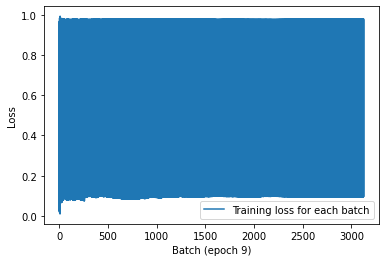

In [9]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],  # Custom Callback is used
          validation_data=(val_images, val_labels))

In [ ]:
from IPython.display import Image, display

for i in range(10):
    display(Image(filename=f"./plot_at_epoch_{i}.png"))

## 요약